In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

### Plotting Theme

In [2]:
#set matplotlib parameters
mp.rc_file_defaults()
rc = {'axes.facecolor':'white','grid.color': '.8',}
plt.rcParams.update(rc)

#set seaborn color palette
sns.set_palette(sns.color_palette("Reds", 6))
palette = ["#66b3ff","#ffb3b3","#ffff33","#eeccff","#1ac6ff"]

# 1. Loading Data

In [7]:
#Loading data file.
#"D:\New folder\PA\marketing_campaign.xlsx"
data = pd.read_excel("D:/New folder/PA/marketing_campaign.xlsx")
print("Data loaded with", len(data), "rows")
data.head()

Data loaded with 2240 rows


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# 2. Data Cleaning

In [8]:
#overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data cleaning steps:

*   Drop un-needed columns

*   Drop rows with empty income values (These 24 null values)

*   Change the Dt_Customer to a DateTime format



In [9]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#drop un-needed columns
data= data.drop(["ID","Z_CostContact", "Z_Revenue"], axis=1)
#drop rows with missing values
data.isna().sum()
data= data.dropna()
#change date format
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [11]:
data.describe() # Basic summary of Numerical columns

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2216.000000  ...          2216.000000        2216.000000   
mean          27.028881  ...             2.671029           5.800993   
std           41.072046  ...             2.926734           3.250785   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          262.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.009477     0.150271  
std        0.244950      0.115588     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [12]:
data.describe(include=['O'])

Education Marital_Status
count         2216           2216
unique           5              8
top     Graduation        Married
freq          1116            857

# 3. Preprocessing

## 3.1. Data Transformation

We can also examine the values for categorial features 

In [13]:
#examining categorical data
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [14]:
#give each feature a smaller set of values
#reducing the # of category 
edu= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
data["Education"]= data["Education"].replace(edu)

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Taken", "Married": "Taken"}
data["Marital_Status"]= data["Marital_Status"].replace(status)

#updated categorical variables
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduate' 'Postgraduate' 'Undergraduate']
Marital_Status Values: ['Single' 'Taken']



We can then transform some of the features as follows:
Features creation and reduction.

In [15]:
#finding customer age
data["Age"]= datetime.now().year-data["Year_Birth"]

#finding family size and number of children
data["Children_Count"]= data["Kidhome"]+data["Teenhome"]
data["Family_Size"]= 1+data["Children_Count"]+data["Marital_Status"].replace({"Taken": 1, "Single": 0})

#finding number of days since person became a customer
data["Customer_For"]= (datetime.now()-data["Dt_Customer"]).dt.days

#finding total spendings of customer
data["Spendings"]= data["MntWines"]+data["MntFruits"]+data["MntFishProducts"]+data["MntMeatProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]

#finding total number of purchases of customer
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

#finding total number of accepted campaigns
data["Accepted_Campaigns"]= data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]

#dropping un-needed columns
data= data.drop(["Year_Birth","Dt_Customer"],axis=1)
data= data.drop(["Kidhome","Teenhome"],axis=1)

In [16]:
data.describe().T

count          mean           std     min      25%  \
Income               2216.0  52247.251354  25173.076661  1730.0  35303.0   
Recency              2216.0     49.012635     28.948352     0.0     24.0   
MntWines             2216.0    305.091606    337.327920     0.0     24.0   
MntFruits            2216.0     26.356047     39.793917     0.0      2.0   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.0   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.0   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.0   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.0   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.0   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.0   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.0   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.0   
AcceptedCmp3         2216.0      0.073556      0.261106     0.0      0.0   
AcceptedCmp4         2216.0      0.074007      0.261842     0.0      0.0   
AcceptedCmp5         2216.0      0.073105      0.260367     0.0      0.0   
AcceptedCmp1         2216.0      0.064079      0.244950     0.0      0.0   
AcceptedCmp2         2216.0      0.013538      0.115588     0.0      0.0   
Complain             2216.0      0.009477      0.096907     0.0      0.0   
Response             2216.0      0.150271      0.357417     0.0      0.0   
Age                  2216.0     53.179603     11.985554    26.0     45.0   
Children_Count       2216.0      0.947202      0.749062     0.0      0.0   
Family_Size          2216.0      2.592509      0.905722     1.0      2.0   
Customer_For         2216.0   3222.521209    202.434667  2869.0   3049.0   
Spendings            2216.0    607.075361    602.900476     5.0     69.0   
Purchases            2216.0     14.880866      7.670957     0.0      8.0   
Accepted_Campaigns   2216.0      0.298285      0.679209     0.0      0.0   

                         50%       75%       max  
Income               51381.5  68522.00  666666.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     52.0     63.00     129.0  
Children_Count           1.0      1.00       3.0  
Family_Size              3.0      3.00       5.0  
Customer_For          3224.5   3398.00    3568.0  
Spendings              396.5   1048.00    2525.0  
Purchases               15.0     21.00      44.0  
Accepted_Campaigns       0.0      0.00       4.0

In [17]:
data.describe(include=["O"])

Education Marital_Status
count       2216           2216
unique         3              2
top     Graduate          Taken
freq        1116           1430

In [18]:
data.skew()#symmetricity of the data

C:\Users\Aashvi\AppData\Local\Temp/ipykernel_9252/2128351763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()#symmetricity of the data


Income                  6.763487
Recency                 0.001648
MntWines                1.170720
MntFruits               2.101658
MntMeatProducts         2.025577
MntFishProducts         1.916369
MntSweetProducts        2.103328
MntGoldProds            1.839231
NumDealsPurchases       2.415272
NumWebPurchases         1.197037
NumCatalogPurchases     1.881075
NumStorePurchases       0.701826
NumWebVisitsMonth       0.218043
AcceptedCmp3            3.269397
AcceptedCmp4            3.256758
AcceptedCmp5            3.282143
AcceptedCmp1            3.562482
AcceptedCmp2            8.424753
Complain               10.132737
Response                1.958748
Age                     0.353661
Children_Count          0.408748
Family_Size             0.086495
Customer_For           -0.016922
Spendings               0.858055
Purchases               0.250936
Accepted_Campaigns      2.725357
dtype: float64

In [19]:
data.kurtosis() # The deviation of the data from normality

C:\Users\Aashvi\AppData\Local\Temp/ipykernel_9252/791442362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis() # The deviation of the data from normality


Income                 159.636700
Recency                 -1.199777
MntWines                 0.582741
MntFruits                4.054082
MntMeatProducts          5.055477
MntFishProducts          3.076476
MntSweetProducts         4.106141
MntGoldProds             3.156342
NumDealsPurchases        8.974490
NumWebPurchases          4.072137
NumCatalogPurchases      8.067126
NumStorePurchases       -0.626462
NumWebVisitsMonth        1.852577
AcceptedCmp3             8.696805
AcceptedCmp4             8.614248
AcceptedCmp5             8.780388
AcceptedCmp1            10.700936
AcceptedCmp2            69.038772
Complain               100.763293
Response                 1.838352
Age                      0.734670
Children_Count          -0.259835
Family_Size             -0.352669
Customer_For            -1.199802
Spendings               -0.346535
Purchases               -0.890765
Accepted_Campaigns       8.016841
dtype: float64

In [20]:
cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns: 
    print("Name of the Category---------", var)
    print(data[var].value_counts())

Name of the Category--------- Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64
Name of the Category--------- Marital_Status
Taken     1430
Single     786
Name: Marital_Status, dtype: int64


In [21]:
# Cross Tabulations of the categorical variables
for var1 in cat_columns:
    for var2 in cat_columns:
        print(pd.crosstab(data[var1], data[var2], normalize=True))


Education      Graduate  Postgraduate  Undergraduate
Education                                           
Graduate        0.50361      0.000000       0.000000
Postgraduate    0.00000      0.381769       0.000000
Undergraduate   0.00000      0.000000       0.114621
Marital_Status    Single     Taken
Education                         
Graduate        0.181408  0.322202
Postgraduate    0.135379  0.246390
Undergraduate   0.037906  0.076715
Education       Graduate  Postgraduate  Undergraduate
Marital_Status                                       
Single          0.181408      0.135379       0.037906
Taken           0.322202      0.246390       0.076715
Marital_Status    Single     Taken
Marital_Status                    
Single          0.354693  0.000000
Taken           0.000000  0.645307


In [22]:
from itertools import product
cat1 = data[cat_columns]
cat2 = data[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
#cat_var_prod

import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            data[i[0]], data[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "p-value"])
chi_test_output

var1            var2   p-value
0       Education  Marital_Status  0.674668
1  Marital_Status       Education  0.674668

In [23]:
data.isnull().sum().sort_values(ascending=False)

Education              0
AcceptedCmp3           0
Purchases              0
Spendings              0
Customer_For           0
Family_Size            0
Children_Count         0
Age                    0
Response               0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
NumWebVisitsMonth      0
Marital_Status         0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Income                 0
Accepted_Campaigns     0
dtype: int64

## 3.2. Outlier Removal

Now we need to check the distribution of values in the dataset to remove any outliers

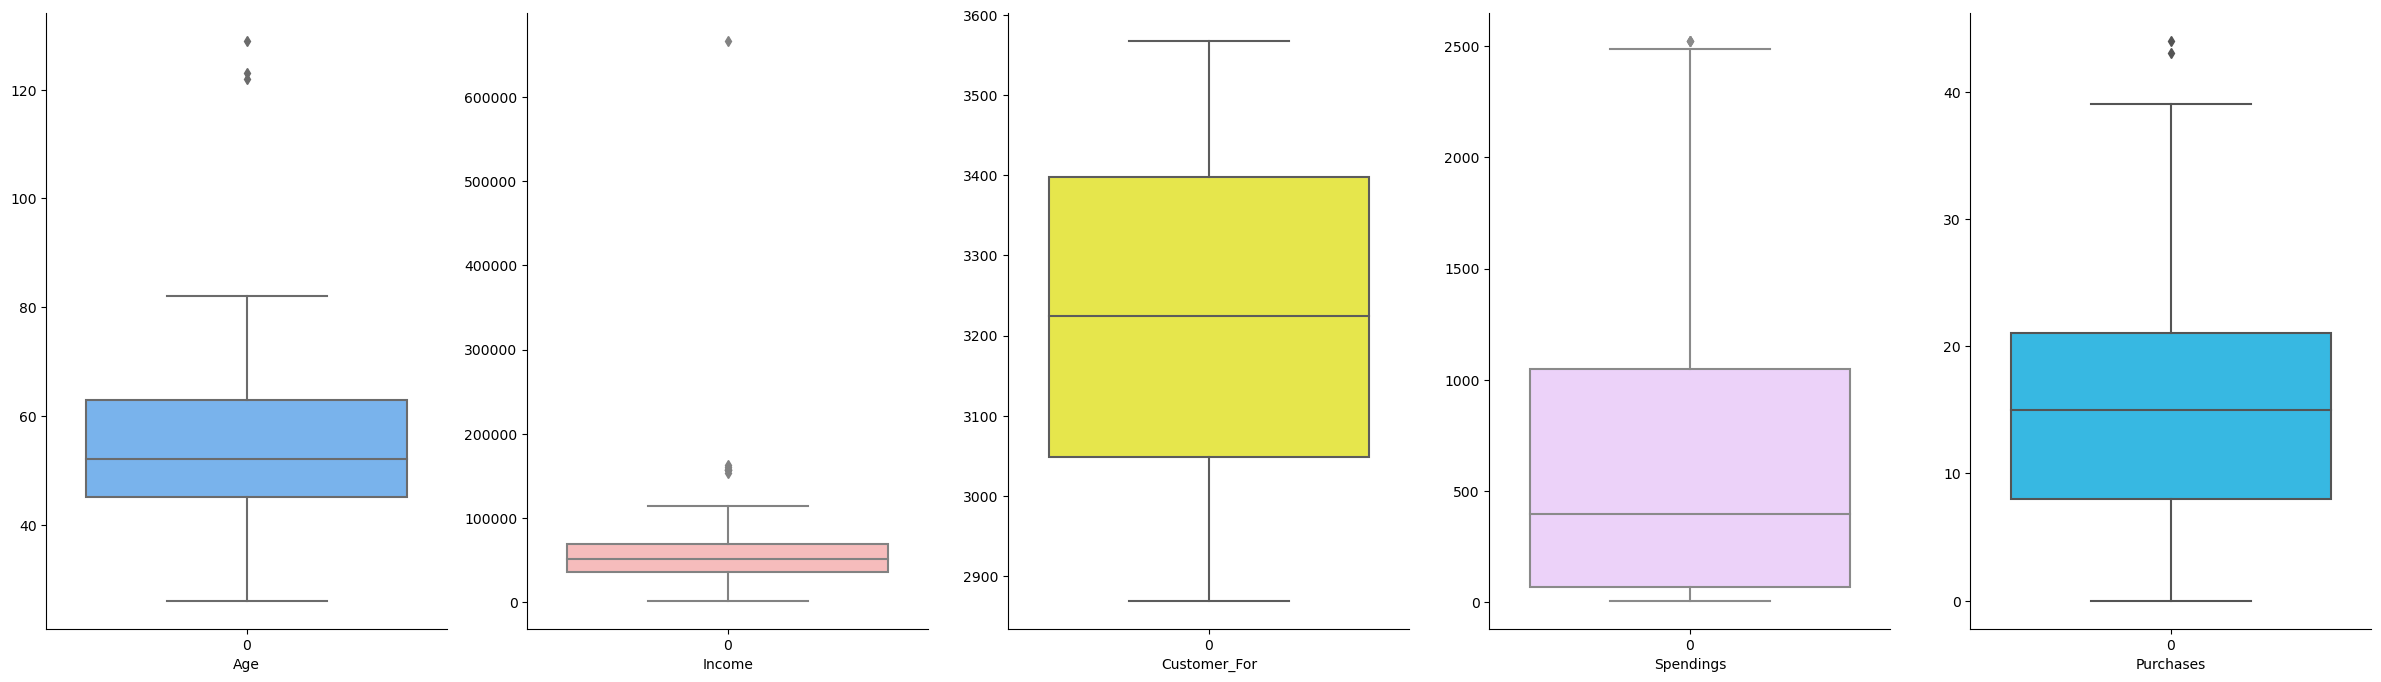

In [24]:
#examine the boxplots of different features
features= ["Age", "Income", "Customer_For", "Spendings", "Purchases"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

In [25]:
#checking the number of outliers in age and income
print("Number of customers above the age of 100= ", len(data[data["Age"]>100]))
print("Number of customers with income above 200,000= ", len(data[data["Income"]>200000]))

Number of customers above the age of 100=  3
Number of customers with income above 200,000=  1


We can see some outliers in the age, income and purchases. Those in the age and income will be removed as they are very few data points. The ones in the purchases will be kept as the range of values is considerable.

In [26]:
num_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Children_Count', 'Family_Size',
       'Customer_For', 'Spendings', 'Purchases', 'Accepted_Campaigns'],
      dtype='object')

In [27]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 5: 
            out.append(i)
    return out
        
    
for var in num_columns:  
    out = Zscore_outlier(data[var])
    if(len(out)>0):
        print(var)
        print("Number of Outliers:",len(out))
        print("Outliers:",out)

Income
Number of Outliers: 1
Outliers: [666666.0]
MntMeatProducts
Number of Outliers: 4
Outliers: [1725, 1582, 1622, 1725]
MntSweetProducts
Number of Outliers: 1
Outliers: [262]
MntGoldProds
Number of Outliers: 1
Outliers: [321]
NumDealsPurchases
Number of Outliers: 13
Outliers: [15, 15, 13, 15, 15, 15, 12, 12, 15, 13, 12, 13, 15]
NumWebPurchases
Number of Outliers: 3
Outliers: [23, 27, 25]
NumCatalogPurchases
Number of Outliers: 4
Outliers: [28, 22, 28, 28]
NumWebVisitsMonth
Number of Outliers: 5
Outliers: [20, 20, 19, 20, 19]
AcceptedCmp2
Number of Outliers: 30
Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Complain
Number of Outliers: 21
Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Age
Number of Outliers: 3
Outliers: [122, 129, 123]
Accepted_Campaigns
Number of Outliers: 11
Outliers: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [28]:
for var in features: 
    out = Zscore_outlier(data[var])
    if(len(out)>0):
        print(var)
        print("Number of Outliers:",len(out))
        print("Outliers:",out)

Age
Number of Outliers: 3
Outliers: [122, 129, 123]
Income
Number of Outliers: 1
Outliers: [666666.0]


In [29]:
data= data.drop(data[(data["Age"]>100) | (data["Income"]>200000)].index)
print("Current data points count= ",len(data))

Current data points count=  2212


In [30]:
dataCopy= data.copy()

## 3.4 Visualizations

C:\Users\Aashvi\AppData\Local\Temp/ipykernel_9252/1602215198.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


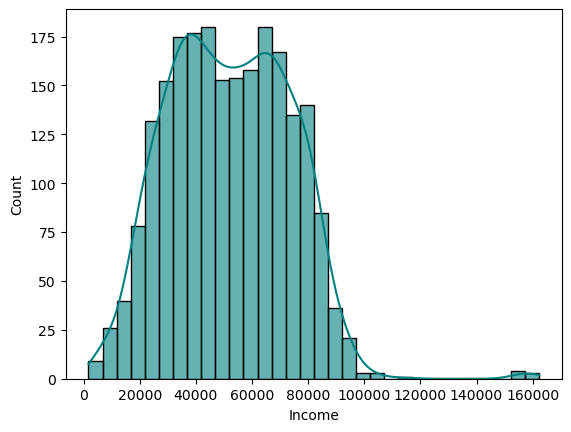

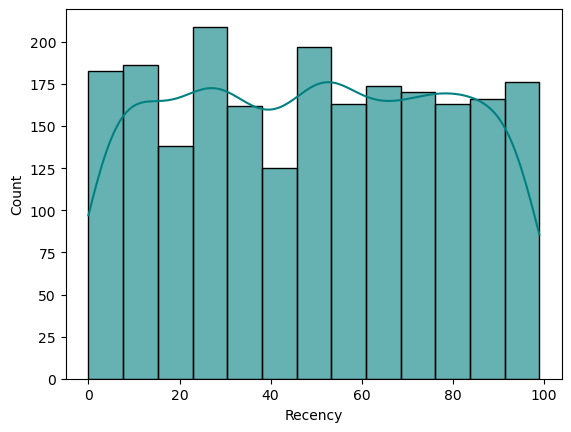

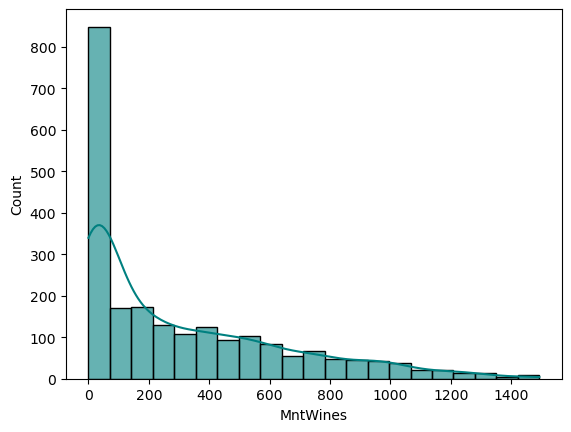

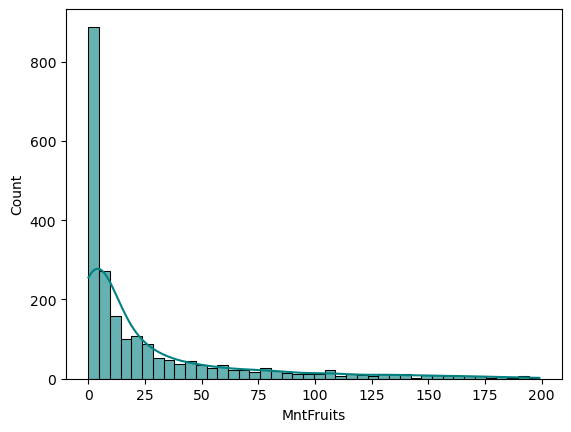

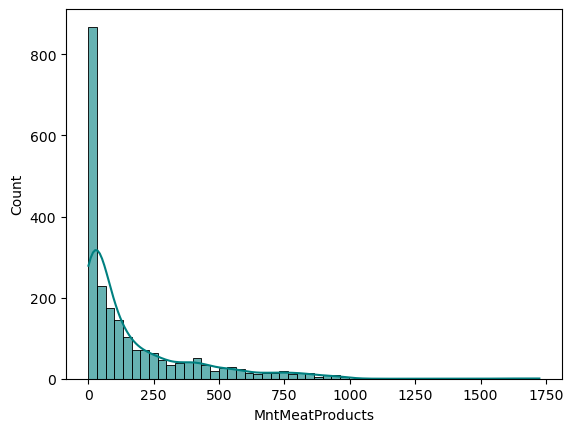

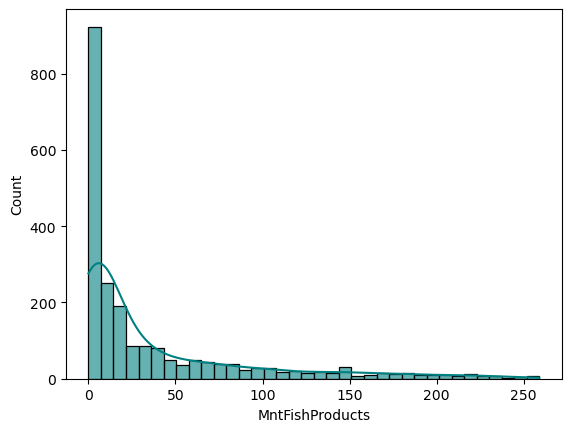

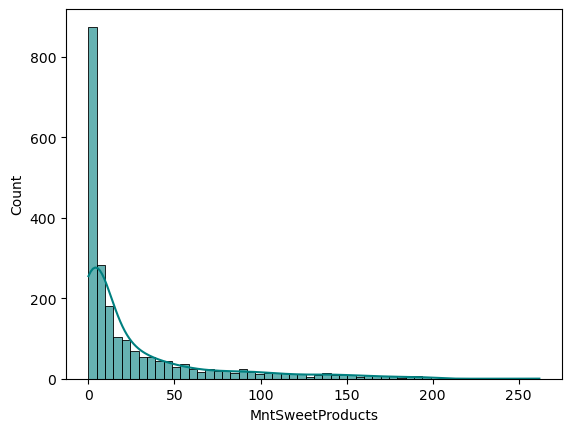

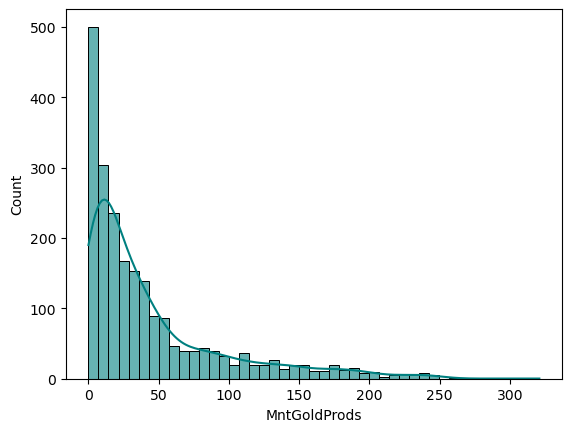

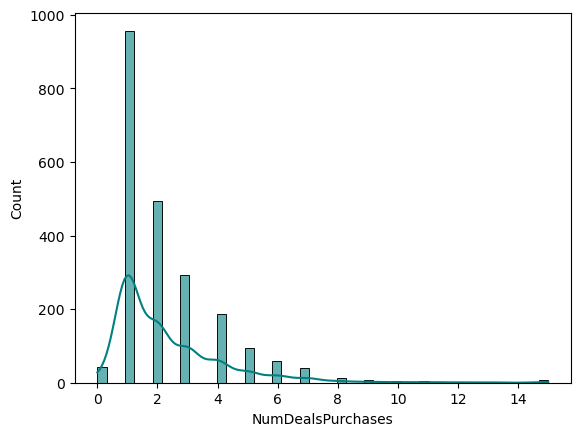

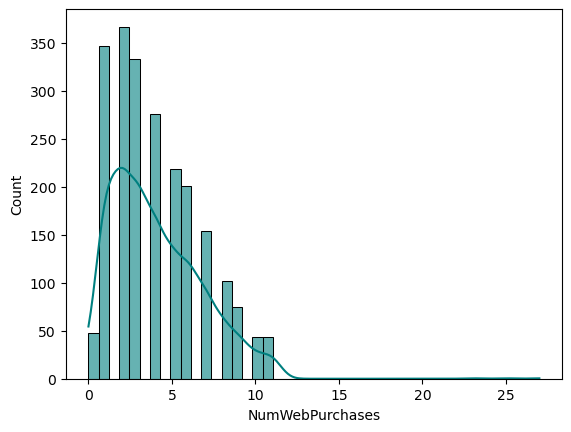

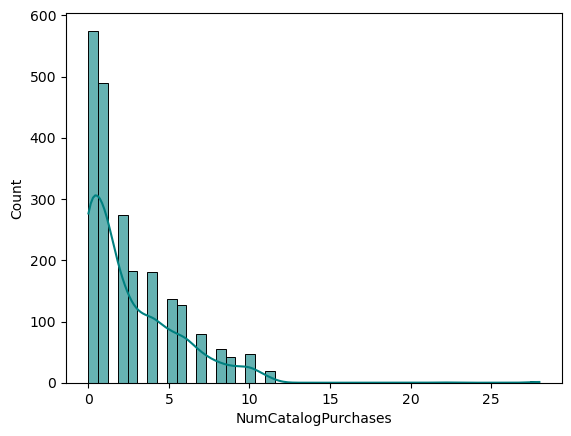

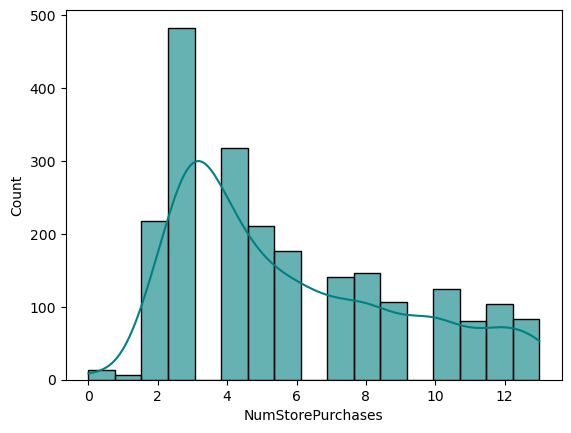

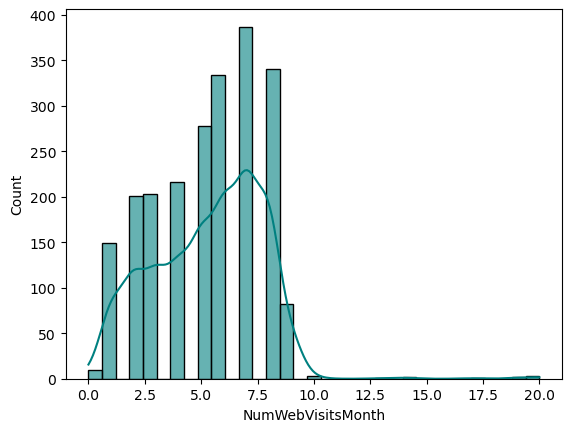

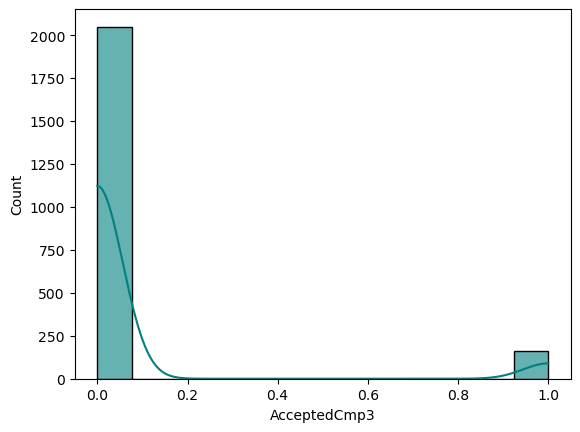

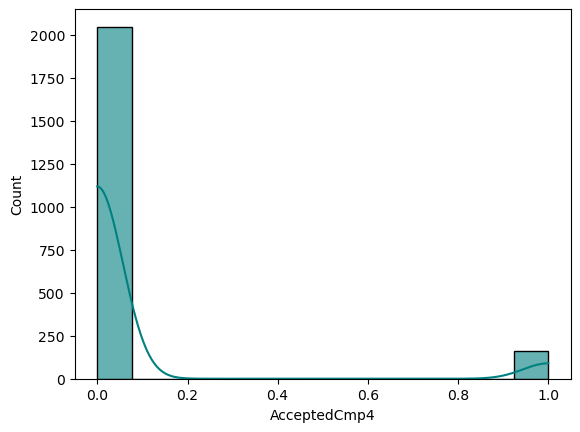

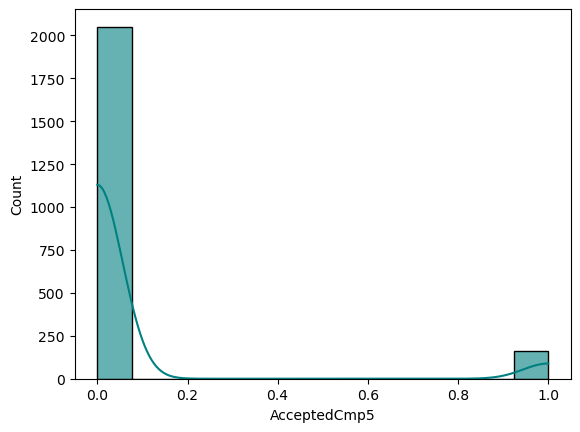

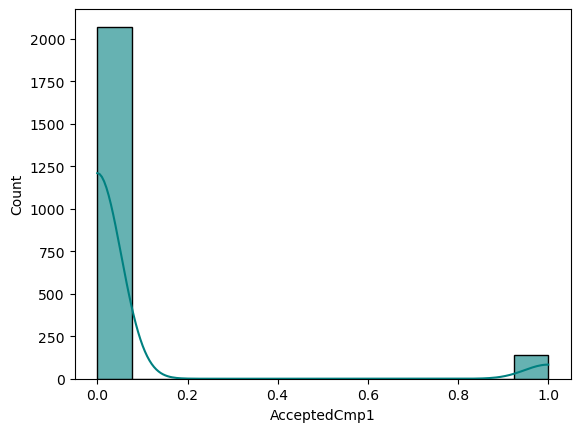

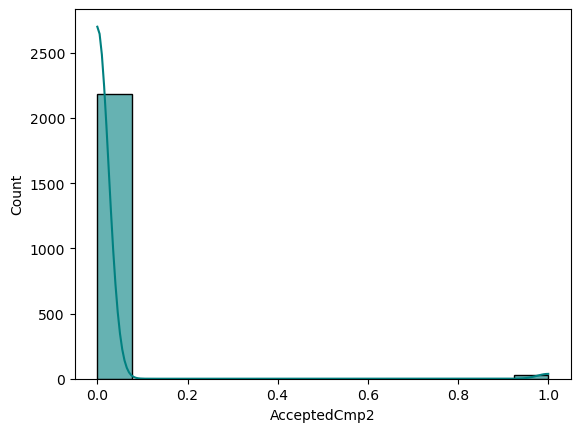

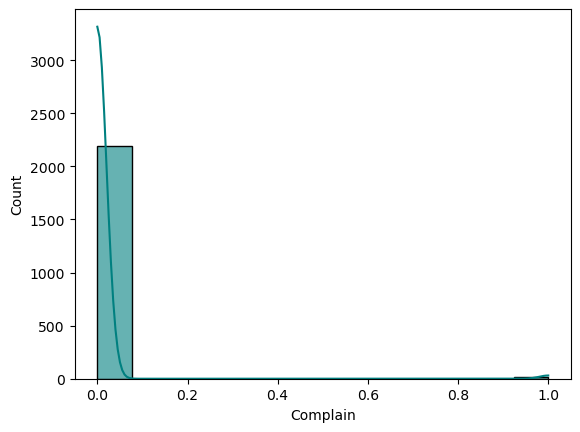

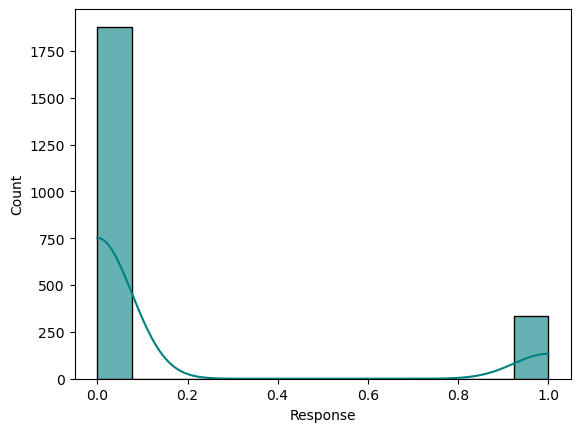

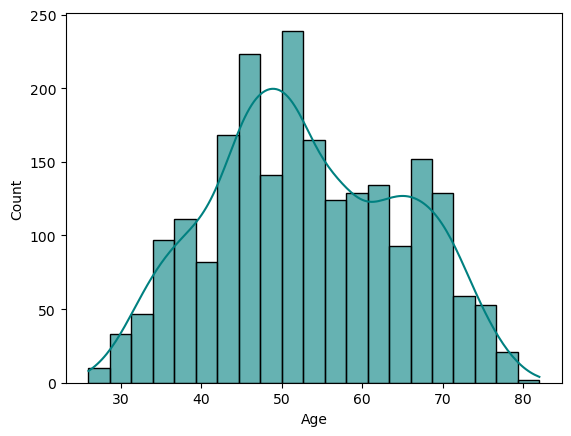

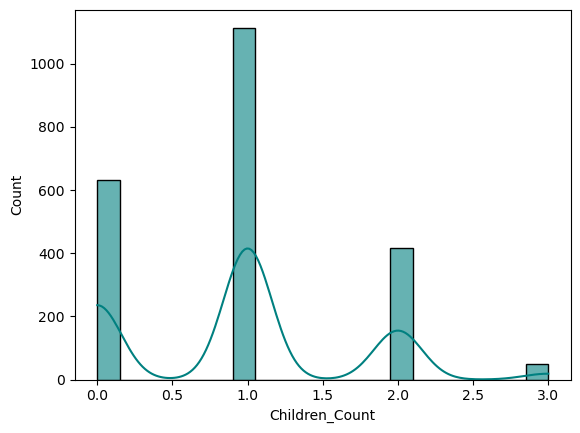

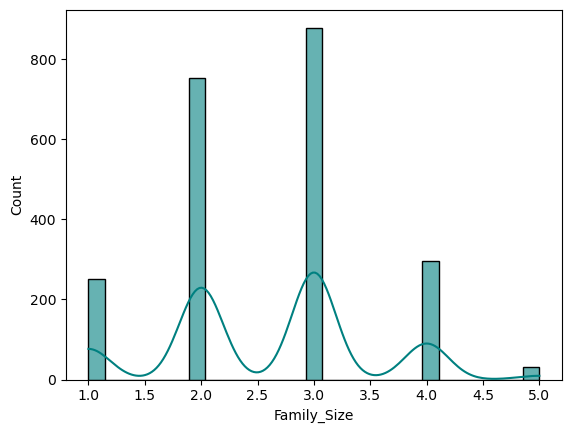

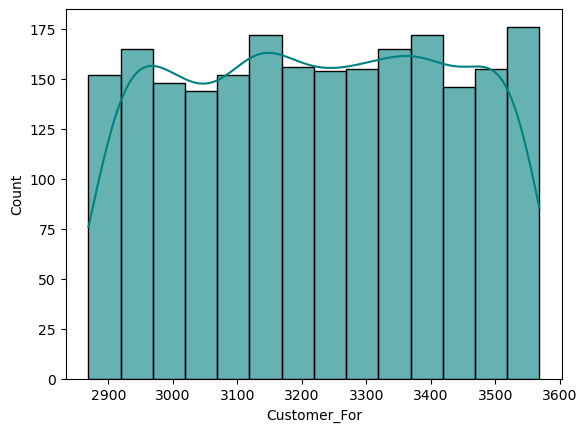

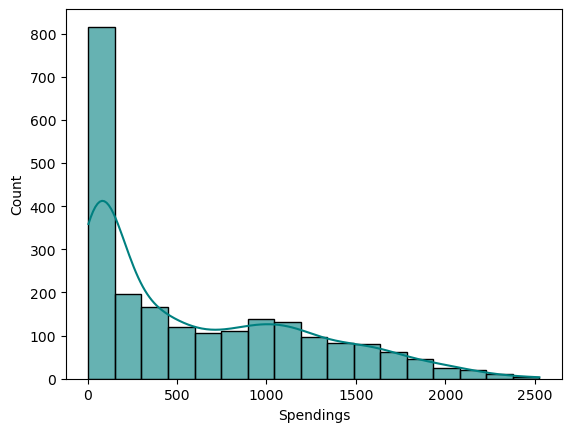

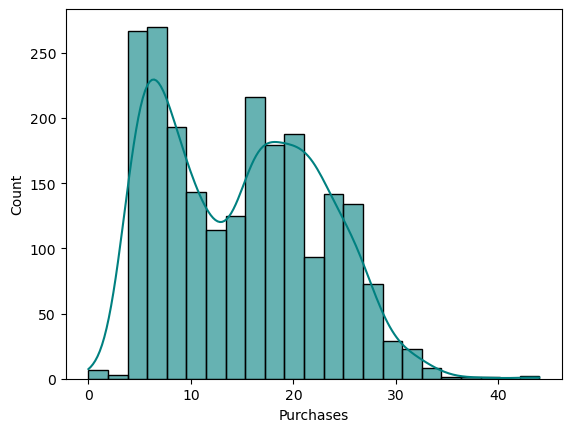

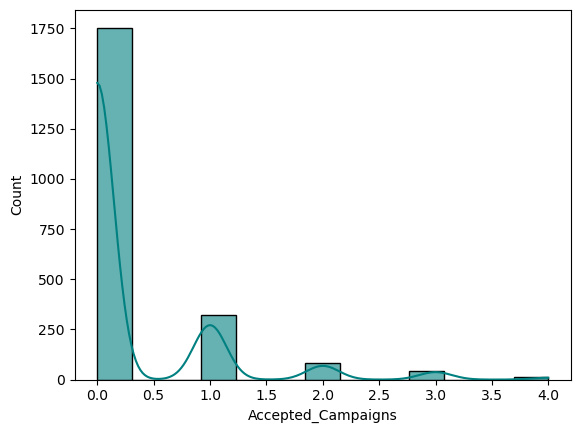

In [31]:
cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(exclude='object').columns
for var in num_columns: 
    plt.figure()
    sns.histplot(data = data, x = var, kde = True, color='teal', alpha=0.6)

C:\Users\Aashvi\AppData\Local\Temp/ipykernel_9252/3139912626.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


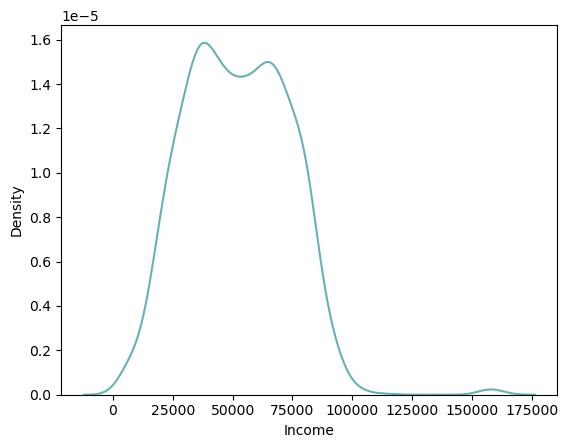

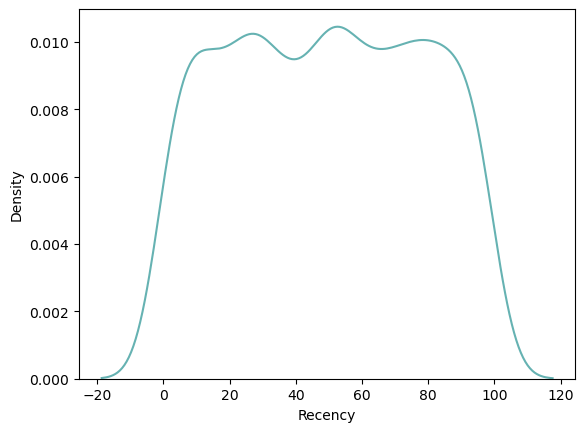

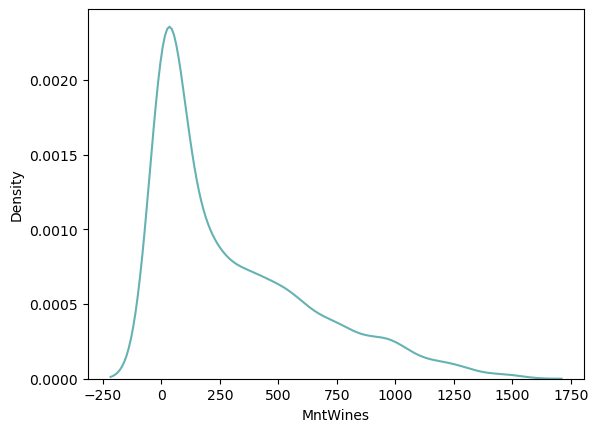

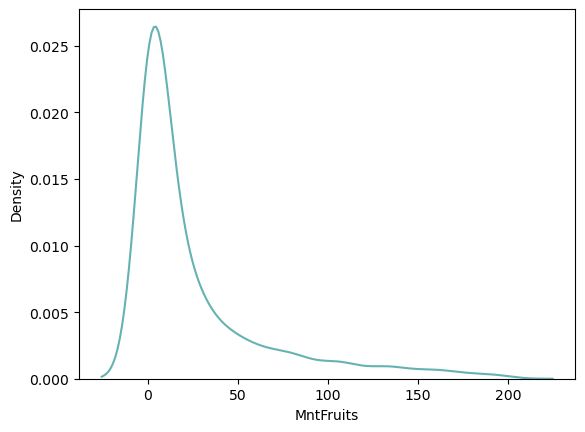

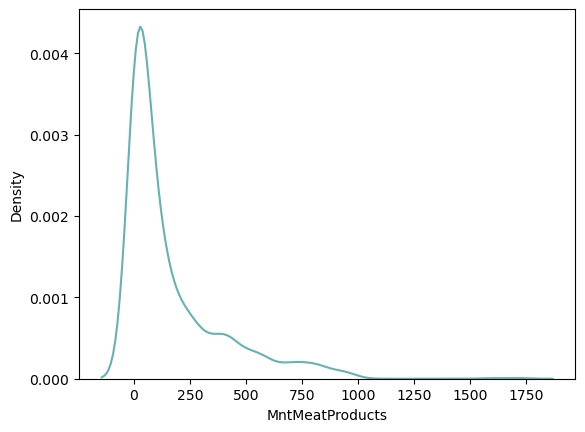

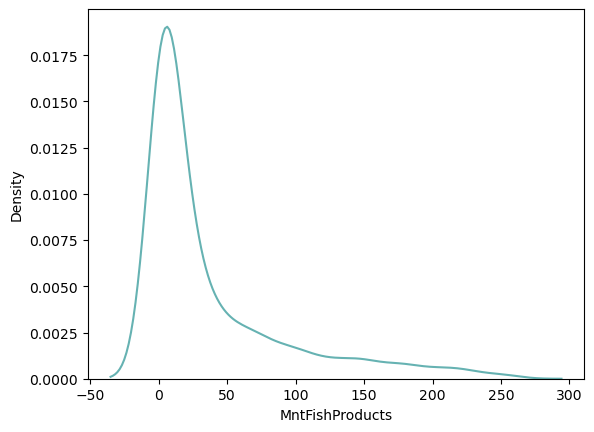

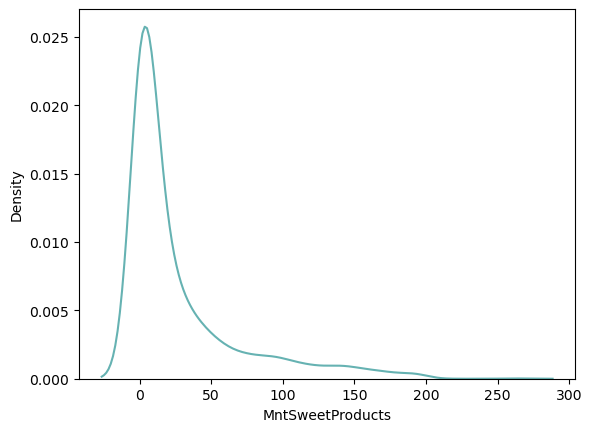

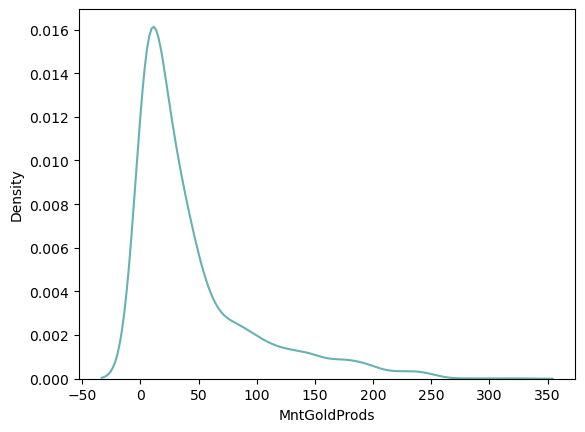

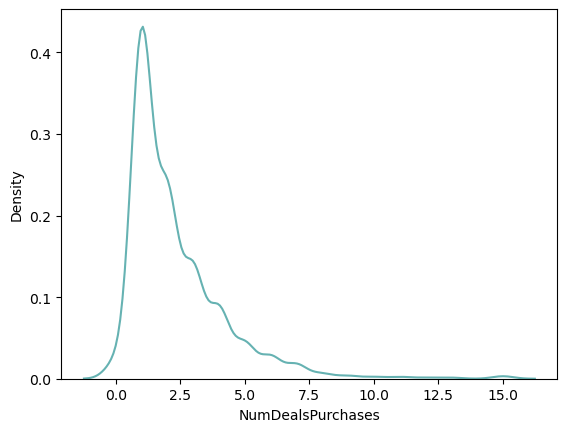

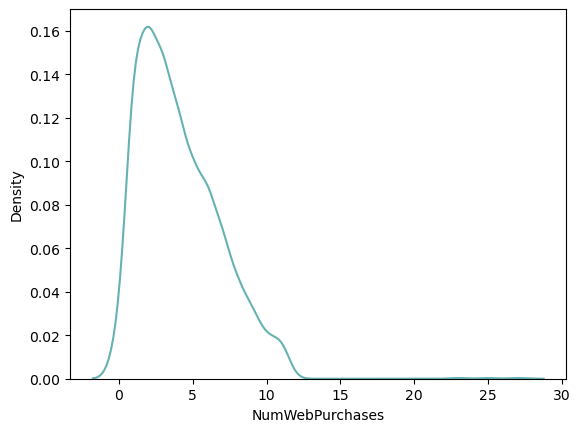

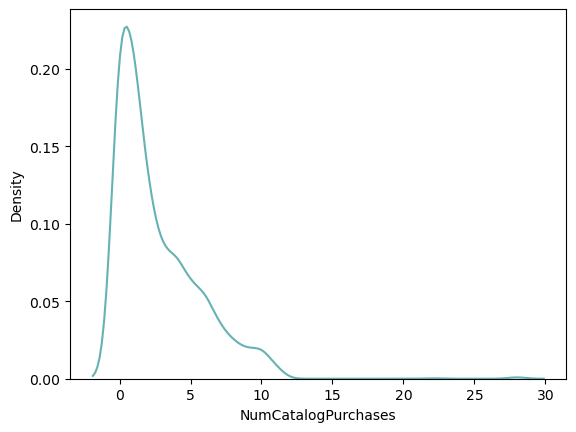

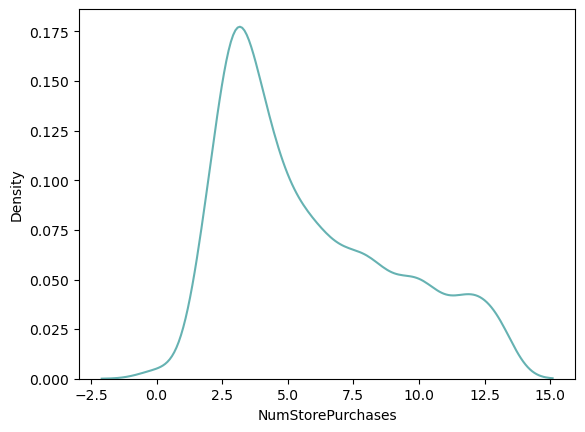

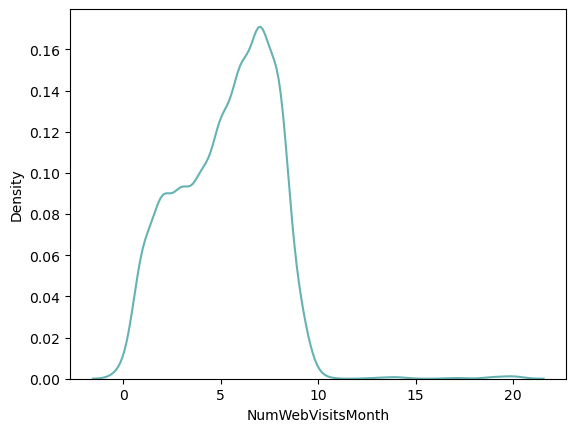

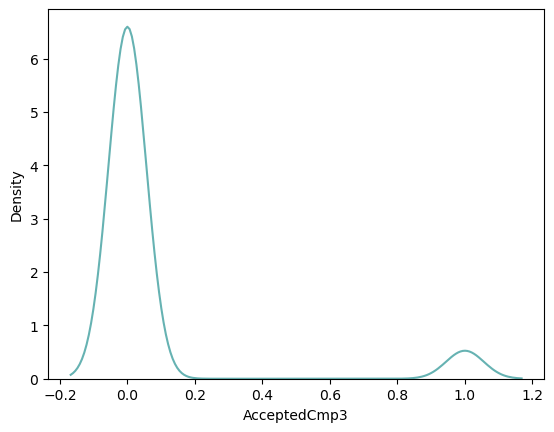

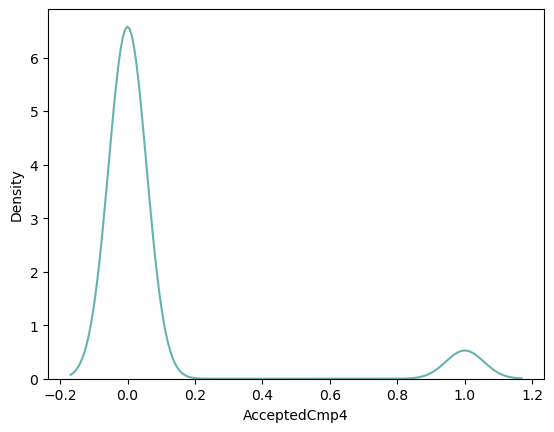

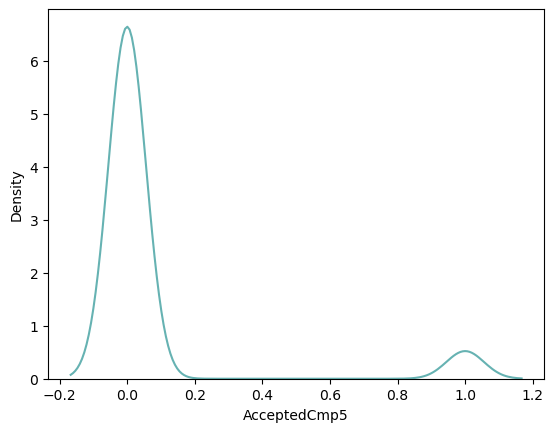

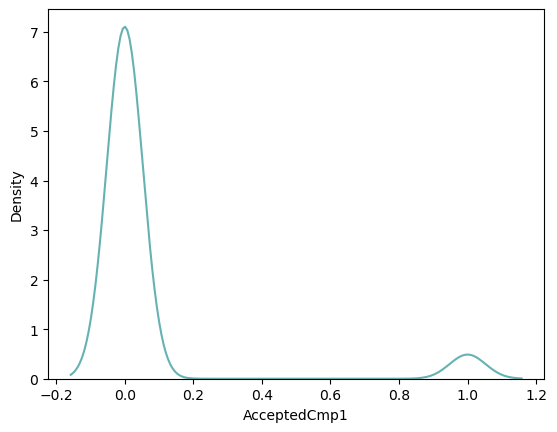

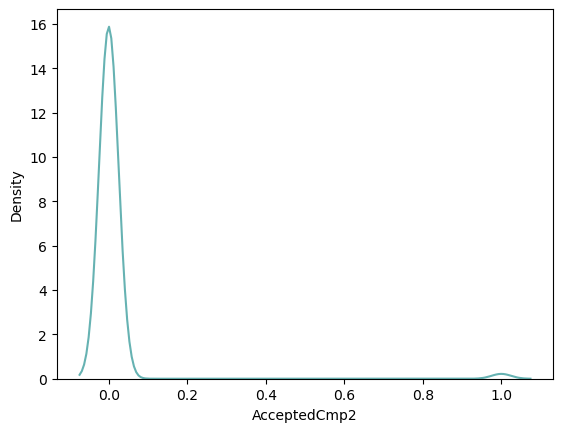

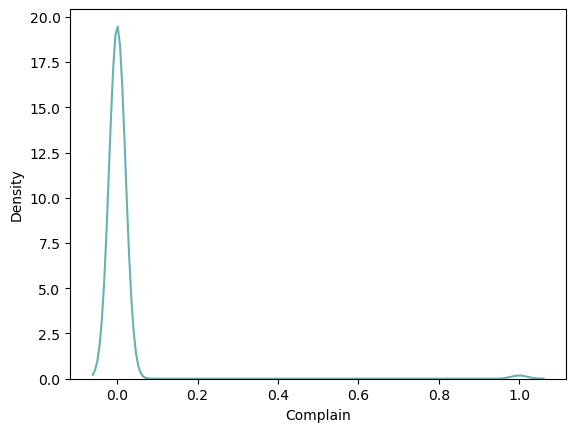

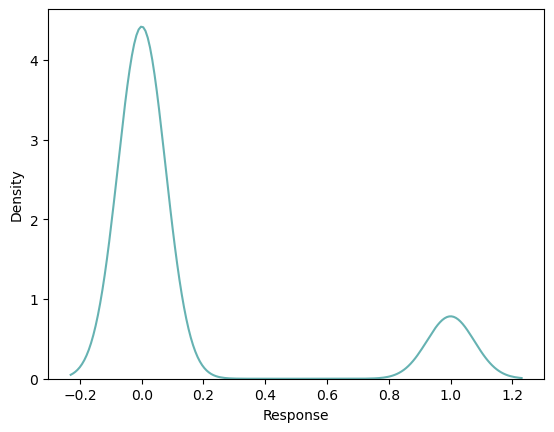

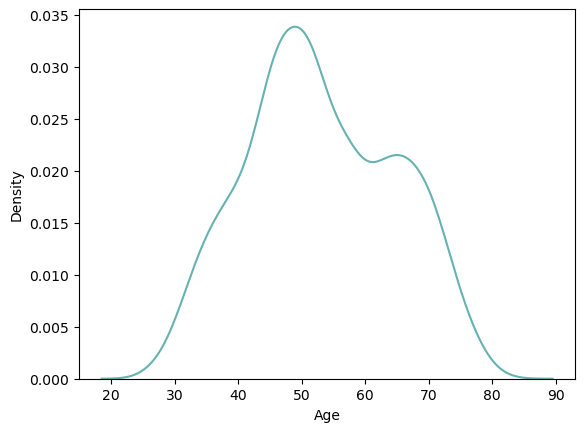

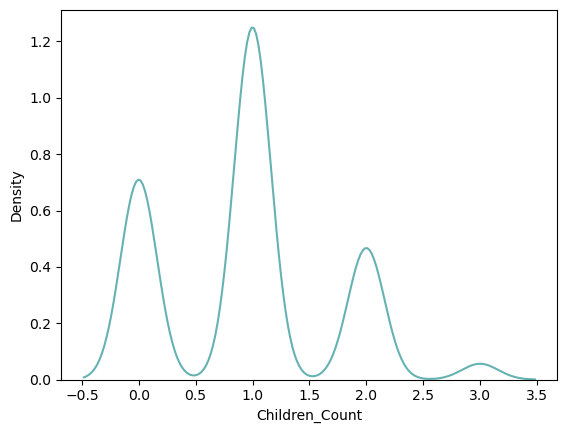

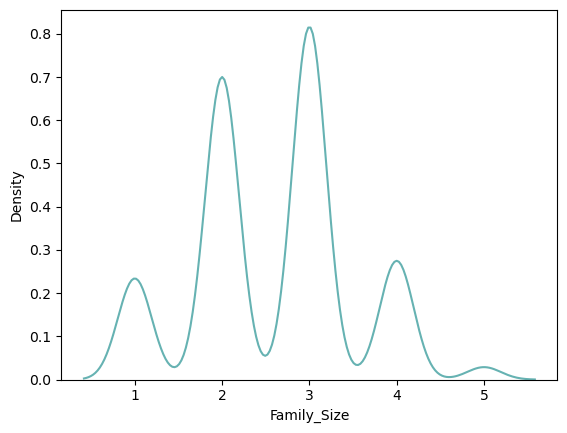

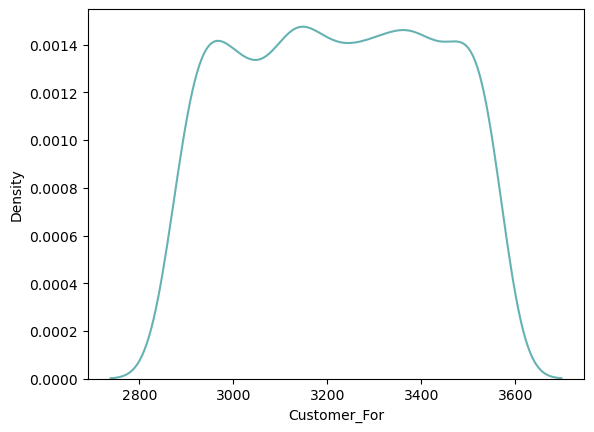

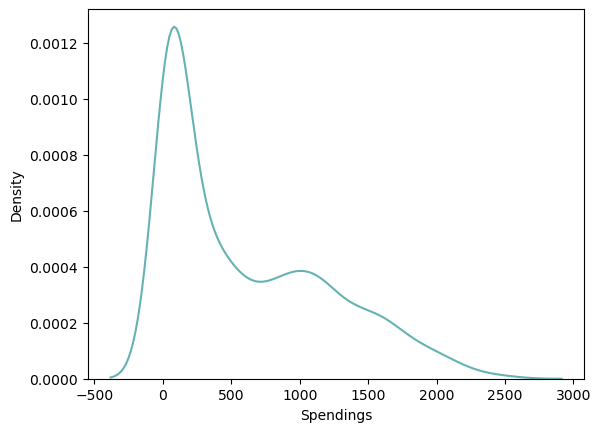

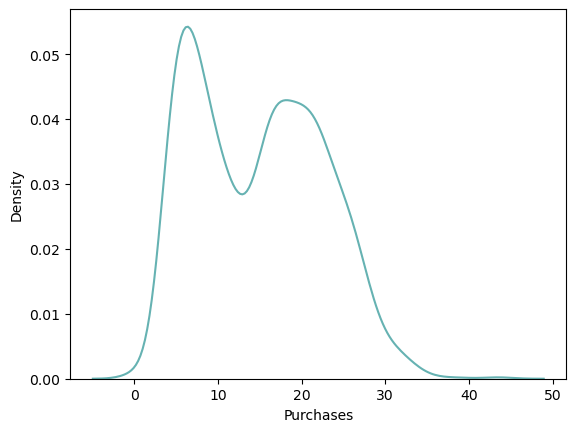

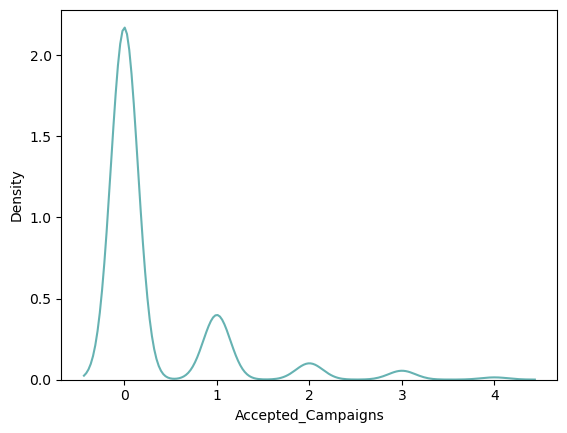

In [32]:
# Numerical Columns - Univariate - Histogram with Density Plot
for var in num_columns: 
    plt.figure()
    sns.kdeplot(data = data, x = var, color='teal', alpha=0.6)

In [33]:
data.describe(include=["O"])

Education Marital_Status
count       2212           2212
unique         3              2
top     Graduate          Taken
freq        1115           1428

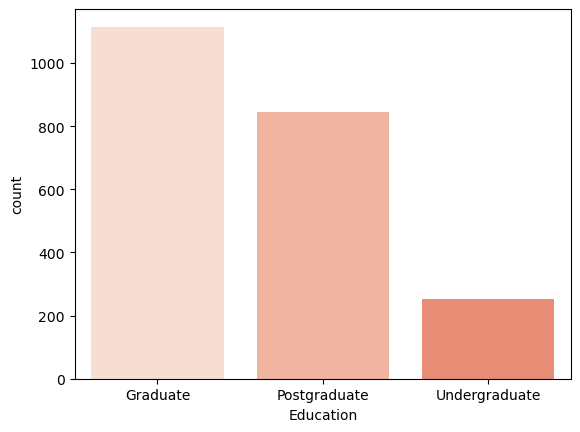

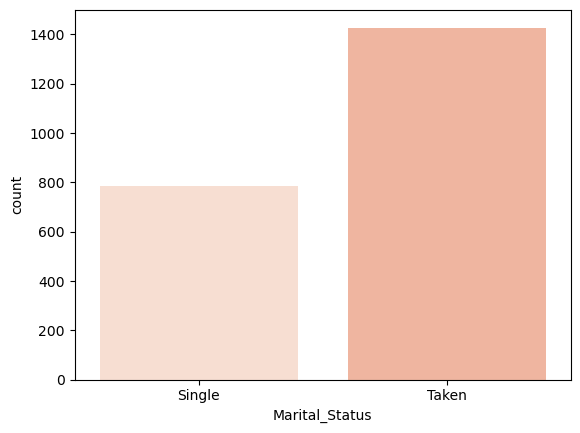

In [34]:
# Categorical Columns - Univariate - Simple Frequency Chart
for var in cat_columns: 
    plt.figure()
    sns.countplot(data = data, x = var)

## 3.3. Encoding Categorical Features

The 2 categorial features we have can be encoded as follows:


*   Education: using a label encoder since it's considered ordinal
*   Marital_Status: using one hot encoding since it's considered nominal



In [35]:
#label encode education
encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)

#hot encode marital_status
data = pd.get_dummies(data)

#check data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2212 non-null   int32  
 1   Income                 2212 non-null   float64
 2   Recency                2212 non-null   int64  
 3   MntWines               2212 non-null   int64  
 4   MntFruits              2212 non-null   int64  
 5   MntMeatProducts        2212 non-null   int64  
 6   MntFishProducts        2212 non-null   int64  
 7   MntSweetProducts       2212 non-null   int64  
 8   MntGoldProds           2212 non-null   int64  
 9   NumDealsPurchases      2212 non-null   int64  
 10  NumWebPurchases        2212 non-null   int64  
 11  NumCatalogPurchases    2212 non-null   int64  
 12  NumStorePurchases      2212 non-null   int64  
 13  NumWebVisitsMonth      2212 non-null   int64  
 14  AcceptedCmp3           2212 non-null   int64  
 15  Acce

## 3.4. Feature Scaling

In [36]:
#scale features
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

#check
data.head()

Education    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0  -0.893586  0.287105  0.310353  0.977660   1.552041         1.690293   
1  -0.893586 -0.260882 -0.380813 -0.872618  -0.637461        -0.718230   
2  -0.893586  0.913196 -0.795514  0.357935   0.570540        -0.178542   
3  -0.893586 -1.176114 -0.795514 -0.872618  -0.561961        -0.655787   
4   0.571657  0.294307  1.554453 -0.392257   0.419540        -0.218684   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0         2.453472          1.483713      0.852576           0.351030  ...   
1        -0.651004         -0.634019     -0.733642          -0.168701  ...   
2         1.339513         -0.147184     -0.037254          -0.688432  ...   
3        -0.504911         -0.585335     -0.752987          -0.168701  ...   
4         0.152508         -0.001133     -0.559545           1.390492  ...   

   Response       Age  Children_Count  Family_Size  Customer_For  Spendings  \
0  2.375425  1.018352       -1.264598    -1.758359      1.527721   1.676245   
1 -0.420977  1.274785        1.404572     0.449070     -1.189011  -0.963297   
2 -0.420977  0.334530       -1.264598    -0.654644     -0.206048   0.280110   
3 -0.420977 -1.289547        0.069987     0.449070     -1.060584  -0.920135   
4 -0.420977 -1.033114        0.069987     0.449070     -0.951915  -0.307562   

   Purchases  Accepted_Campaigns  Marital_Status_Single  Marital_Status_Taken  
0   1.317945            -0.43916               1.349603             -1.349603  
1  -1.159273            -0.43916               1.349603             -1.349603  
2   0.796425            -0.43916              -0.740959              0.740959  
3  -0.898513            -0.43916              -0.740959              0.740959  
4   0.535666            -0.43916              -0.740959              0.740959  

[5 rows x 30 columns]

## 3.5 Feature Extraction

Now let's take a look on the coorelation between features

In [37]:
cor_data=data.corr()
cor_data

Education    Income   Recency  MntWines  MntFruits  \
Education               1.000000 -0.086253 -0.026170 -0.027698  -0.087330   
Income                 -0.086253  1.000000  0.007965  0.688209   0.507354   
Recency                -0.026170  0.007965  1.000000  0.015981  -0.005257   
MntWines               -0.027698  0.688209  0.015981  1.000000   0.385844   
MntFruits              -0.087330  0.507354 -0.005257  0.385844   1.000000   
MntMeatProducts        -0.087255  0.692279  0.022914  0.568081   0.546740   
MntFishProducts        -0.065795  0.520040  0.000788  0.396915   0.593038   
MntSweetProducts       -0.064139  0.523599  0.025244  0.389583   0.571474   
MntGoldProds           -0.103291  0.388299  0.018148  0.391461   0.393459   
NumDealsPurchases      -0.007876 -0.108207  0.002591  0.009117  -0.134191   
NumWebPurchases        -0.050720  0.459265 -0.005680  0.553663   0.302301   
NumCatalogPurchases    -0.057226  0.696589  0.024197  0.634237   0.485611   
NumStorePurchases      -0.049521  0.631424 -0.000460  0.640219   0.459875   
NumWebVisitsMonth       0.042173 -0.650257 -0.018965 -0.321616  -0.417741   
AcceptedCmp3            0.016717 -0.015152 -0.032361  0.061360   0.014644   
AcceptedCmp4           -0.015211  0.219633  0.017520  0.373349   0.006598   
AcceptedCmp5           -0.033624  0.395569  0.000233  0.472889   0.208990   
AcceptedCmp1           -0.028646  0.327524 -0.021147  0.351610   0.192417   
AcceptedCmp2           -0.013147  0.104036 -0.001429  0.206309  -0.009924   
Complain               -0.022373 -0.027900  0.005713 -0.036420  -0.002956   
Response                0.003553  0.161387 -0.200114  0.246320   0.123007   
Age                    -0.024431  0.199977  0.015694  0.164615   0.013447   
Children_Count         -0.007299 -0.343529  0.018062 -0.353356  -0.395161   
Family_Size             0.004291 -0.286638  0.014717 -0.296702  -0.341414   
Customer_For           -0.003297 -0.023760  0.025681  0.167852   0.068137   
Spendings              -0.072964  0.792740  0.020479  0.892996   0.612129   
Purchases              -0.062928  0.670413  0.007658  0.713520   0.454582   
Accepted_Campaigns     -0.024866  0.365986 -0.013471  0.510349   0.155811   
Marital_Status_Single  -0.019563  0.004803  0.000417  0.008473   0.027677   
Marital_Status_Taken    0.019563 -0.004803 -0.000417 -0.008473  -0.027677   

                       MntMeatProducts  MntFishProducts  MntSweetProducts  \
Education                    -0.087255        -0.065795         -0.064139   
Income                        0.692279         0.520040          0.523599   
Recency                       0.022914         0.000788          0.025244   
MntWines                      0.568081         0.396915          0.389583   
MntFruits                     0.546740         0.593038          0.571474   
MntMeatProducts               1.000000         0.572986          0.534624   
MntFishProducts               0.572986         1.000000          0.583484   
MntSweetProducts              0.534624         0.583484          1.000000   
MntGoldProds                  0.357556         0.426299          0.356754   
NumDealsPurchases            -0.121128        -0.143147         -0.121395   
NumWebPurchases               0.306841         0.299428          0.333608   
NumCatalogPurchases           0.733787         0.532241          0.494623   
NumStorePurchases             0.486349         0.457885          0.455150   
NumWebVisitsMonth            -0.539194        -0.446151         -0.422289   
AcceptedCmp3                  0.018416        -0.000276          0.001660   
AcceptedCmp4                  0.091677         0.016058          0.029206   
AcceptedCmp5                  0.375252         0.194793          0.258417   
AcceptedCmp1                  0.313379         0.261712          0.245113   
AcceptedCmp2                  0.043549         0.002322          0.010142   
Complain                     -0.021017        -0.019098         -0.020569   
Response          

In [38]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = cor_data.unstack().sort_values(ascending=False)
sorted_mat[(abs(sorted_mat)>0.8) & (abs(sorted_mat)<1)]

MntWines           Spendings            0.892996
Spendings          MntWines             0.892996
Children_Count     Family_Size          0.849574
Family_Size        Children_Count       0.849574
Spendings          MntMeatProducts      0.845543
MntMeatProducts    Spendings            0.845543
Purchases          NumStorePurchases    0.822210
NumStorePurchases  Purchases            0.822210
dtype: float64

A lot of features have high correlation values. PCA will be used to reduce the dimensions while keeping 95% of the variations

In [73]:
#95% variations
pca = PCA(n_components = 0.95)
pca.fit(data)
reduced_data = pd.DataFrame(pca.transform(data))

print("Current number of features= ",len(reduced_data.columns))

Current number of features=  20


By keeping 95% of the variations, the number of features dropped from 32 to 20, but we want to reduce that even more to reduce complexity, so we will compromise more variations.

In [40]:
pca.explained_variance_ratio_

array([0.28926444, 0.08951379, 0.08459598, 0.0708079 , 0.04761854,
       0.03805497, 0.0358212 , 0.03377424, 0.03274065, 0.02918942,
       0.02901875, 0.02610964, 0.02510758, 0.02094261, 0.02032203,
       0.01911278, 0.01813481, 0.01601874, 0.01471176, 0.01409797])

In [41]:
reduced_data

0         1         2         3         4         5         6   \
0     4.598150 -0.784712 -1.889805  2.538429  1.743337  0.232215  0.415819   
1    -2.852080 -1.358741 -0.413045  0.477108 -1.841739 -1.887785  0.210796   
2     1.778335  0.861040 -1.243363 -0.825477 -0.080371  0.245717 -0.602843   
3    -2.844348 -0.162843  0.134991 -1.393986  0.369209  0.024584 -0.019777   
4    -0.414256  1.447765 -0.491351 -0.546917 -0.229388  0.415967  0.618984   
...        ...       ...       ...       ...       ...       ...       ...   
2207  2.251681  2.065235 -0.908656  0.010601  1.025291 -0.330937  0.952942   
2208 -0.846243  3.450705  2.902040  0.730112 -2.065651 -2.634103 -0.285468   
2209  2.395280 -2.112995  0.385235  0.904794 -2.442310  2.077647  1.108776   
2210  1.546542  1.734174 -0.845275 -0.827428 -0.812537 -1.016407 -1.800180   
2211 -2.160008  1.398663  1.272279  0.559374  0.776393 -0.452628 -1.036566   

            7         8         9         10        11        12        13  \
0     0.572654 -0.595606 -0.329582 -2.015877  0.628776  0.433652  0.329222   
1     0.447199 -0.672293 -0.304449 -0.553980  0.404343  0.189482 -0.105853   
2     0.576204 -0.717378  1.538334  0.105581 -0.613298 -0.925662 -0.063106   
3     0.441081 -1.155122  0.337932  1.136664 -0.546239 -0.006512  0.213461   
4    -1.076315  0.588475 -0.695309  1.352031 -0.067248  0.327794  0.405491   
...        ...       ...       ...       ...       ...       ...       ...   
2207 -0.268301 -0.886086  1.094223 -0.158913  0.483307 -1.589012 -0.185582   
2208 -0.580226  0.339398 -2.285406  0.274039  0.497641 -1.894268  2.472181   
2209 -0.332878 -0.270344  0.714980  1.339621 -1.584424 -0.263221 -1.424486   
2210  0.263641  0.156734  0.751318  0.253232  0.112157 -0.194823  0.151405   
2211  0.741447  0.020363 -0.925991 -2.023606  0.717819  0.769517 -0.133306   

            14        15        16        17        18        19  
0    -0.989872  0.882120  1.271755  0.405155  1.336279  0.743587  
1     0.163746 -0.017861 -0.225270  0.173589  0.284439  0.190609  
2    -0.536480 -0.620267  0.182191 -0.433886  0.001698 -0.436841  
3    -0.165924 -0.023566  0.131210  0.174130  0.018795 -0.098257  
4    -0.598228  0.299097  1.100616  0.319722 -0.058120 -0.458650  
...        ...       ...       ...       ...       ...       ...  
2207  2.307044  0.192878  0.634163 -0.087283  0.467890  1.970038  
2208 -0.910446 -0.757699 -0.108248 -0.167535  0.581674 -0.294971  
2209 -1.051919  1.599531 -0.521550 -0.686645 -0.063976 -1.101907  
2210  0.130462 -0.057435 -0.148603 -0.125292 -0.061497  0.032198  
2211  0.219602  0.056317  0.982189 -1.041160 -0.503011 -0.142834  

[2212 rows x 20 columns]

In [42]:
cor_data=reduced_data.corr()

In [43]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = cor_data.unstack().sort_values(ascending=False)
sorted_mat[(abs(sorted_mat)>0.8) & (abs(sorted_mat)<1)]

Series([], dtype: float64)

In [44]:
#75% variations
#pca = PCA(n_components = 0.75)
#pca.fit(data)
#reduced_data = pd.DataFrame(pca.transform(data))
#print("Current number of features= ",len(reduced_data.columns))

Current number of features=  10


# 4. Data Clustering - K-Means 

## 4.1. Optimal Number of Clusters

First, we need to have a good sense of how many clusters are in our dataset. To determine this, we will use the elbow method.

In [45]:
#calculate distortions for different values of k (number of clusters)
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data)
    distortions.append(kmeanModel.inertia_)

C:\Users\Aashvi\AppData\Local\Temp/ipykernel_9252/3206906214.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', color=palette[-1])


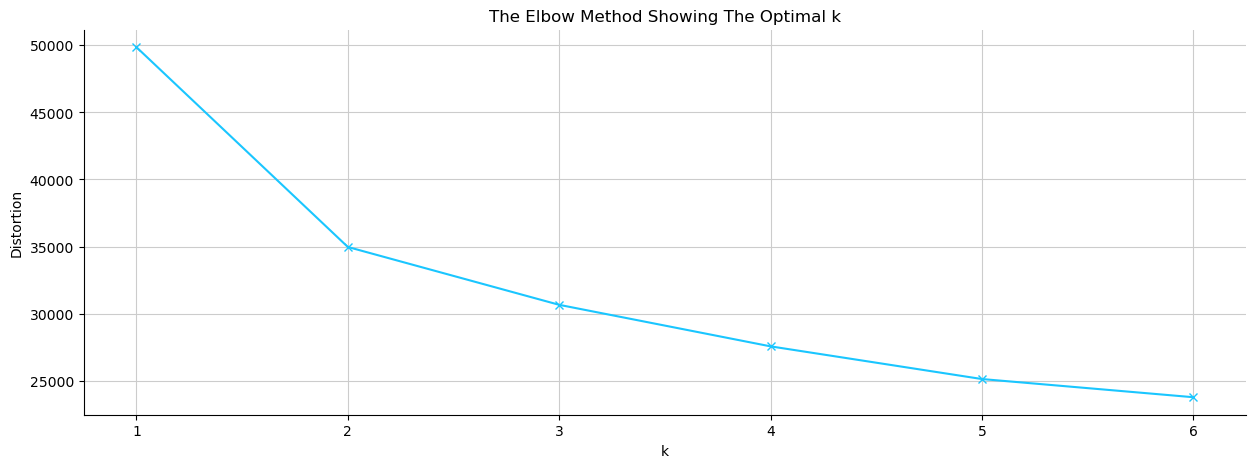

In [46]:
#plot elbow graph
plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bx-', color=palette[-1])
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sns.despine()
plt.show()

Using the above plot, we will choose the value of k to be 2.

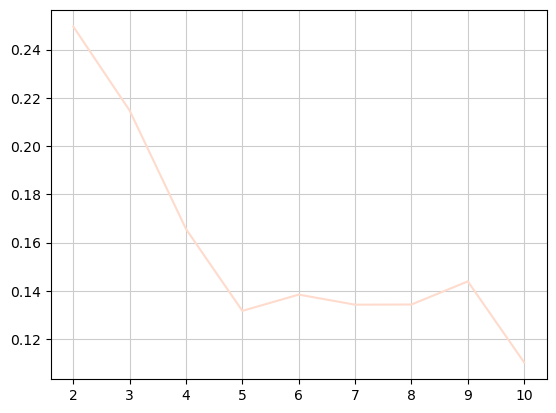

In [47]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))
plt.plot(range(2, kmax+1),sil)

## 4.2. Clustering Algorithm

Clustering will be performed using the K-means algorithm, which assumes the clusters are somehow spherical in shape.

In [48]:
#clustering data and adding the output to the data dataframe
clusters = KMeans(n_clusters=2, random_state=202).fit(reduced_data)
data["Personality"]= clusters.labels_
dataCopy["Personality"]= clusters.labels_

data.head()

Education    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0  -0.893586  0.287105  0.310353  0.977660   1.552041         1.690293   
1  -0.893586 -0.260882 -0.380813 -0.872618  -0.637461        -0.718230   
2  -0.893586  0.913196 -0.795514  0.357935   0.570540        -0.178542   
3  -0.893586 -1.176114 -0.795514 -0.872618  -0.561961        -0.655787   
4   0.571657  0.294307  1.554453 -0.392257   0.419540        -0.218684   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0         2.453472          1.483713      0.852576           0.351030  ...   
1        -0.651004         -0.634019     -0.733642          -0.168701  ...   
2         1.339513         -0.147184     -0.037254          -0.688432  ...   
3        -0.504911         -0.585335     -0.752987          -0.168701  ...   
4         0.152508         -0.001133     -0.559545           1.390492  ...   

        Age  Children_Count  Family_Size  Customer_For  Spendings  Purchases  \
0  1.018352       -1.264598    -1.758359      1.527721   1.676245   1.317945   
1  1.274785        1.404572     0.449070     -1.189011  -0.963297  -1.159273   
2  0.334530       -1.264598    -0.654644     -0.206048   0.280110   0.796425   
3 -1.289547        0.069987     0.449070     -1.060584  -0.920135  -0.898513   
4 -1.033114        0.069987     0.449070     -0.951915  -0.307562   0.535666   

   Accepted_Campaigns  Marital_Status_Single  Marital_Status_Taken  \
0            -0.43916               1.349603             -1.349603   
1            -0.43916               1.349603             -1.349603   
2            -0.43916              -0.740959              0.740959   
3            -0.43916              -0.740959              0.740959   
4            -0.43916              -0.740959              0.740959   

   Personality  
0            1  
1            0  
2            1  
3            0  
4            0  

[5 rows x 31 columns]

## 4.3. Algorithm Evaluation

To get a sense of whether our clustering algorithm provides reasonable results, we can look at the pie and bar plots of the clusters to see how they're distributed.

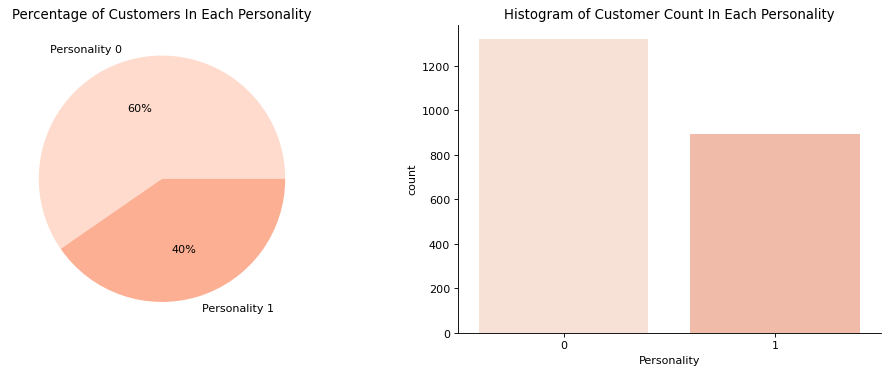

In [49]:
#define labels
labels = ['Personality 0', 'Personality 1']
counts= []

#compute counts
for i in range(2):
  counts.append(len(data[data["Personality"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

#bar plot
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histogram of Customer Count In Each Personality")
sns.countplot(x=data["Personality"], alpha=.9, ax=ax1)
sns.despine()

plt.show()


# 4.4. Data Analysis

It's time to find out the special characteristics of each cluster. To do that, we'll study their demographics and behaviors against different features.

## 4.4.1. Demographics

###  Age

To study the demographics of the different personality groups, we'll first take a look on their age distributions.

C:\Users\Aashvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


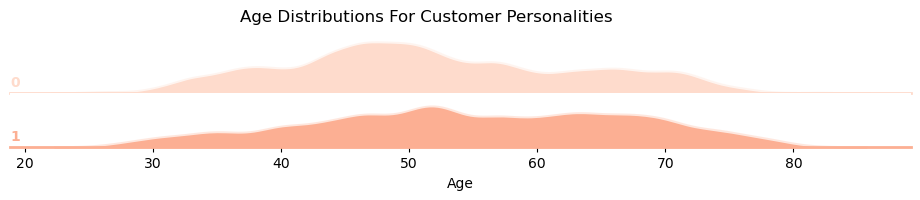

In [50]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5,alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Age, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Age")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.01)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Age Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Conclusion:


*   Personality 0: Has a wide and nearly even distribution, which show a diverse variation in age groups.
*   Personality 1: mainly consists of older people compared to other personalities

To validate this, let's calculate some stats.



In [51]:
#personality 0 age stats
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Age"]<55])/len(d))*100
print("Percentage of customer below 55 in personality 0= {:.2f}% ".format(perc))

#personality 1 age stats
d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Age"]>50])/len(d))*100
print("Percentage of customer above 50 in personality 1= {:.2f}% ".format(perc))

Percentage of customer below 55 in personality 0= 62.93% 
Percentage of customer above 50 in personality 1= 63.38% 


###  Family Breakdown

To analyze based on family shape, we'll consider 2 aspects; the family size and the number of children.

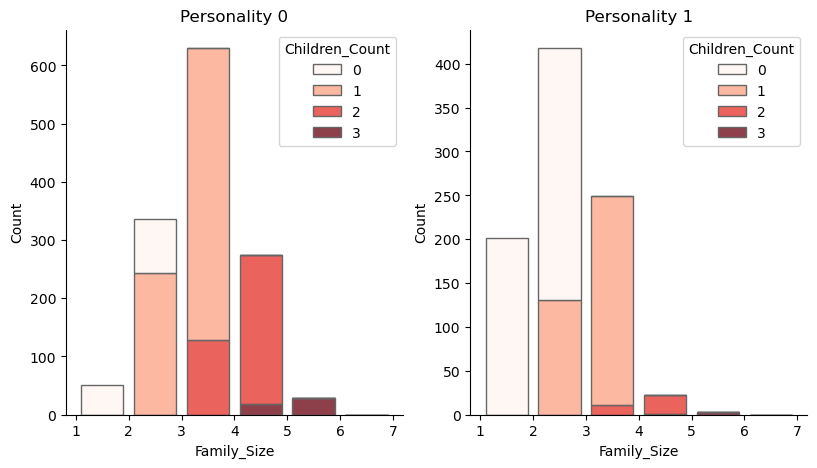

In [52]:
plt.figure(figsize=(20, 5))

#plotting a histogram of family size showing children count in each bin
for i in range(2):
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  sns.histplot(
      dataCopy[dataCopy["Personality"]==i],
      x="Family_Size",
      hue="Children_Count",
      multiple="stack",
      palette="Reds",
      edgecolor=".4",
      bins= list(range(1,8)),
      shrink= .8
  )
  sns.despine()


Conclusion:

1.   Personality 0:
  *  The majority of customers have 1-2 kids and a partner.
  *  A considerable percentage are single parents.
2.   Personality 1:
  *  The vast majority have 0 kids, followed by 1 kid.
  *  A considerable percentage are living alone.
  *  A considerable percentage are single parents. 

Time for some stats.

In [53]:
#personality 0 kids stats
d= dataCopy[dataCopy["Personality"]==0]
perc= ((len(d[d["Children_Count"]==1]) + len(d[d["Children_Count"]==2]))/len(d))*100
print("Percentage of customers having 1-2 kids in personality 0 = {:.2f}% ".format(perc))

#personality 1 kids stats
d= dataCopy[dataCopy["Personality"]==1]
perc= ((len(d[d["Children_Count"]==0]))/len(d))*100
print("Percentage of customers having 0 kids in personality 1 = {:.2f}% ".format(perc))
perc= ((len(d[d["Children_Count"]==1]))/len(d))*100
print("Percentage of customers having 1 kids in personality 1 = {:.2f}% ".format(perc))
perc= ((len(d[d["Family_Size"]==1]))/len(d))*100
print("Percentage of customers living alone personality 1= {:.2f}% ".format(perc))

Percentage of customers having 1-2 kids in personality 0 = 85.60% 
Percentage of customers having 0 kids in personality 1 = 54.65% 
Percentage of customers having 1 kids in personality 1 = 41.32% 
Percentage of customers living alone personality 1= 22.51% 


In [54]:
#single parents in personality 0
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 0= {:.2f}% ".format(perc))

#single parents in personality 1
d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 1= {:.2f}% ".format(perc))

Percentage of single parents belonging to personality 0= 56.12% 
Percentage of single parents belonging to personality 1= 43.88% 


In [55]:
d

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0         Graduate         Single  58138.0       58       635         88   
2         Graduate          Taken  71613.0       26       426         49   
5     Postgraduate          Taken  62513.0       16       520         42   
6         Graduate         Single  55635.0       34       235         65   
12        Graduate         Single  63033.0       82       194         61   
...            ...            ...      ...      ...       ...        ...   
2224  Postgraduate         Single  57642.0       24       580          6   
2231  Postgraduate         Single  44802.0       71       853         10   
2235      Graduate          Taken  61223.0       46       709         43   
2237      Graduate         Single  56981.0       91       908         48   
2238  Postgraduate          Taken  69245.0        8       428         30   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
2                 127              111                21            42  ...   
5                  98                0                42            14  ...   
6                 164               50                49            27  ...   
12                480              225               112            30  ...   
...               ...              ...               ...           ...  ...   
2224               58                8                 0            27  ...   
2231              143               13                10            20  ...   
2235              182               42               118           247  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   

      Complain  Response  Age  Children_Count  Family_Size  Customer_For  \
0            0         1   65               0            1          3532   
2            0         0   57               0            2          3181   
5            0         0   55               1            3          3162   
6            0         0   51               1            2          3462   
12           0         0   63               0            1          3095   
...        ...       ...  ...             ...          ...           ...   
2224         0         0   52               1            2          3040   
2231         0         0   52               0            1          3546   
2235         0         0   55               1            3          3250   
2237         0         0   41               0            1          3024   
2238         0         0   66               1            3          3025   

      Spendings  Purchases  Accepted_Campaigns  Personality  
0          1617         25                   0            1  
2           776         21                   0            1  
5           716         22                   0            1  
6           590         21                   0            1  
12         1102         16                   0            1  
...         ...        ...                 ...          ...  
2224        679         22                   1            1  
2231       1049         27                   0            1  
2235       1341         18                   0            1  
2237       1241         19                   1            1  
2238        843         23                   0            1  

[893 rows x 30 columns]

###  Education

Next, we will examine the educational level of the different customer personalities using a histogram.

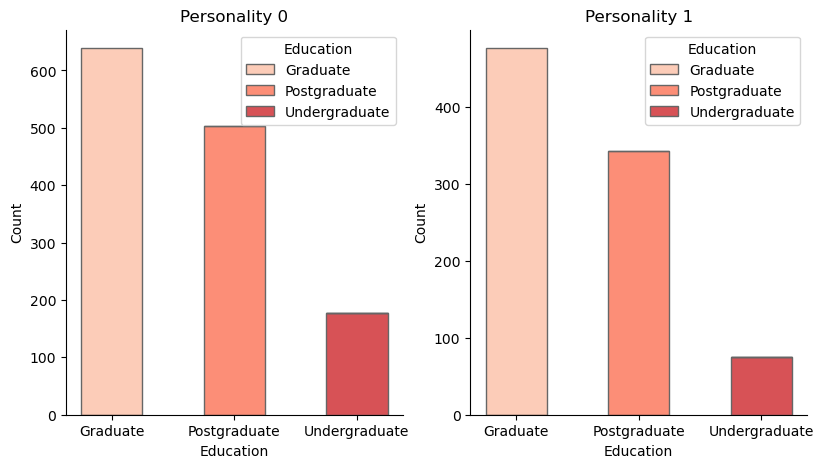

In [56]:
plt.figure(figsize=(20, 5))

#plotting a histogram of family size showing children count in each bin
for i in range(2):
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  sns.histplot(
      dataCopy[dataCopy["Personality"]==i],
      x="Education",
      hue= "Education",
      multiple="stack",
      palette="Reds",
      edgecolor=".4",
      shrink= .5
  )
  sns.despine()

Conclusion:


*   Personalities 0 & 1 have very similar education distributions.
*   The education distributions don't really help in differentiating between the different segments.





###  Income

Now we'll visualize the income distributions of the different segments.

C:\Users\Aashvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


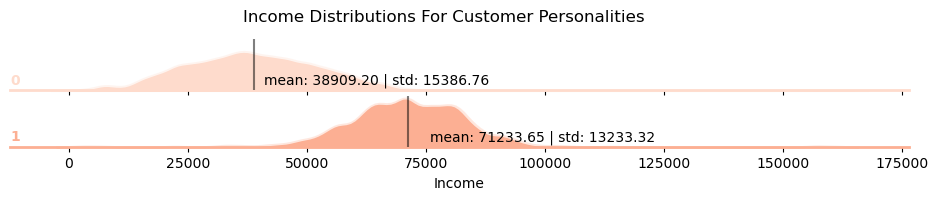

In [57]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Income",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Income", clip_on=False, color="w", lw=2, bw_adjust=.5, alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Income, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Income")

# Add vertical lines for mean age on each plot
def vertical_mean_line_survived(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="-", 
                color = "black", alpha=.5)
    txkw = dict(size=10, color = "black")
    tx = "mean: {:.2f} | std: {:.2f}".format(x.mean(),x.std())
    ax = plt.gca()
    ax.text(0.06+x.mean()/175000, .2, tx, color="black", size= 10,
            ha="left", va="center", transform=ax.transAxes)
    # plt.text(x.mean()+1, 0.0052, tx, **txkw)

g.map(vertical_mean_line_survived, 'Income')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Income Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Conclusion:

1.   Personality 0 (Low):
  *   Low average income group
2.   Personality 1 (High):
  *  High average income group

## 4.4.2. Business Related

We will focus here on the business-related aspect of the customer's personality to get more insights.

### Products Breakdown

We will use a simple pie chart to visualize the types of products frequently bought by the customers.

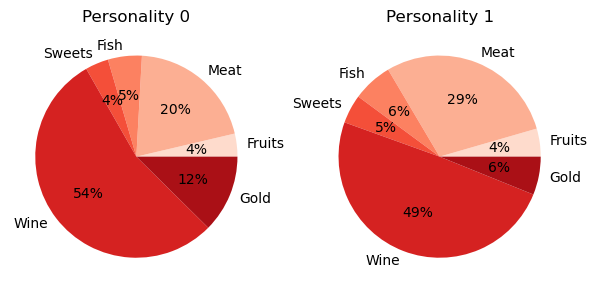

In [58]:
#define labels
labels = ['Fruits', 'Meat', 'Fish', 'Sweets', 'Wine', 'Gold']
plt.figure(figsize=(15, 10), dpi=100)

#compute counts
for i in range(2):
  counts= []
  #getting the data of the current segment
  d= dataCopy[dataCopy["Personality"]==i]

  #computing counts
  counts.append(d["MntFruits"].sum())
  counts.append(d["MntMeatProducts"].sum())
  counts.append(d["MntFishProducts"].sum())
  counts.append(d["MntSweetProducts"].sum())
  counts.append(d["MntWines"].sum())
  counts.append(d["MntGoldProds"].sum())

  #plotting chart
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  plt.pie(counts, labels = labels, autopct='%.0f%%')

plt.show()

From the above plots, we can see that:
*  The percentage of spendings on primary goods such as fruits, fish and sweets is very close across all segments.
* Personality 0 spends relatively more on gold.
* Personality 1 spends relatively more on meat.


###  Spendings

To examine the value added by the customers, we will plot the purchases against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

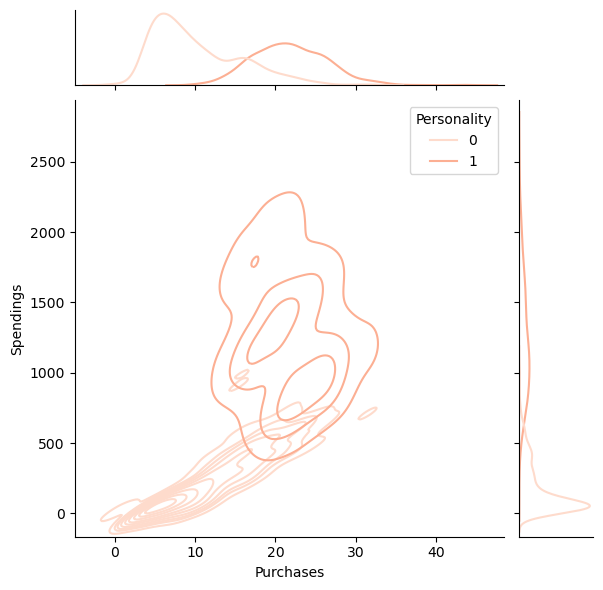

In [59]:
# Show the joint distribution using kernel density estimation
plt.figure(figsize=(5, 5), dpi=80)
#sns.lineplot(data=dataCopy, x="year", y="passengers")
g = sns.jointplot(data=dataCopy, x="Purchases", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Few purchases, low spendings.
2.   Personality 1: Relatively higher spendings, meaning that they buy more expensive products. 

We will also plot the family size against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

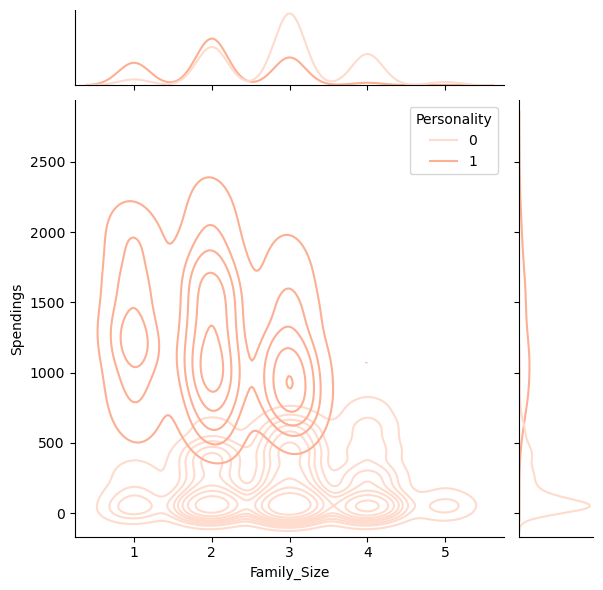

In [60]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Family_Size", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Family_size 3 has more spendings.
2.   Personality 1: Family_size 1&2 has more spendings. 



We will now plot the customer_for against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

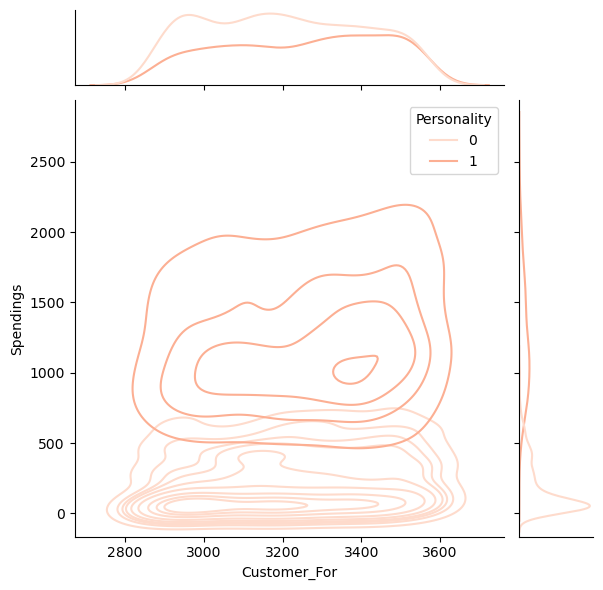

In [61]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Customer_For", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Spent is almost constant.
2.   Personality 1: Spent more as they stay for more time. 



## 4.4.3. Behavioural

###  Response To Campaigns

Finally, we will examine the customer's reactions to the company's campaigns in terms of how many campaigns have they accepted.

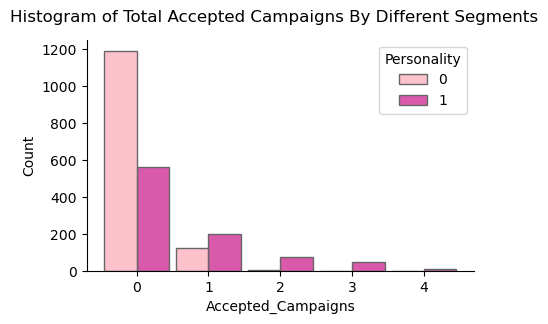

In [62]:
f= plt.figure(figsize=(5, 3))
f.suptitle("Histogram of Total Accepted Campaigns By Different Segments")
sns.histplot(dataCopy, x="Accepted_Campaigns", hue= "Personality", multiple="dodge", palette="RdPu", edgecolor=".4", discrete= True, shrink= .9)
sns.despine()

Conclusion:

*   Personalities 0 & 1: Majority accepted 0 campaigns. Very few accepted only 1.
*   Personality 1: Some accepted 3 or 4.



# 4.5. Summary

We finally reached the end of the analysis. Here is a summary of the main features of each customer segment/personality:

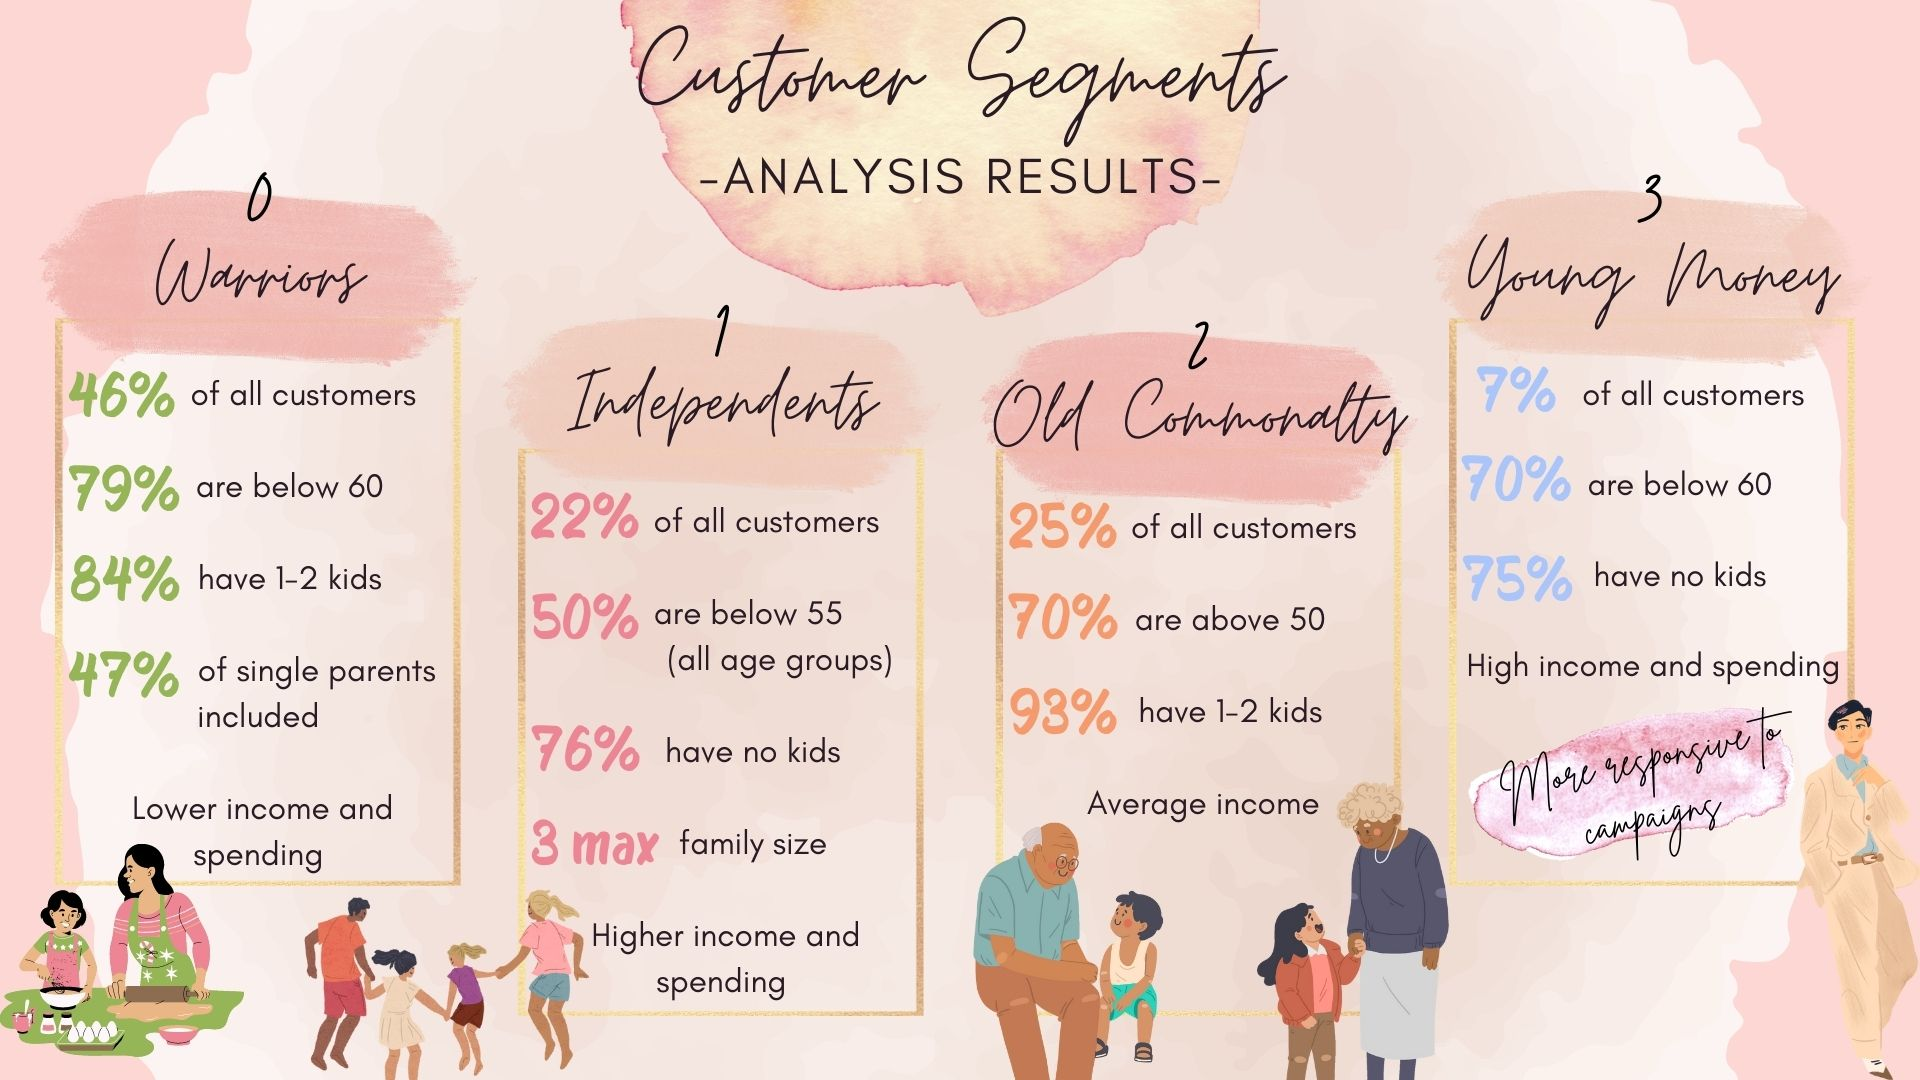

# 5.Agglomerative Hierarchical Clustering

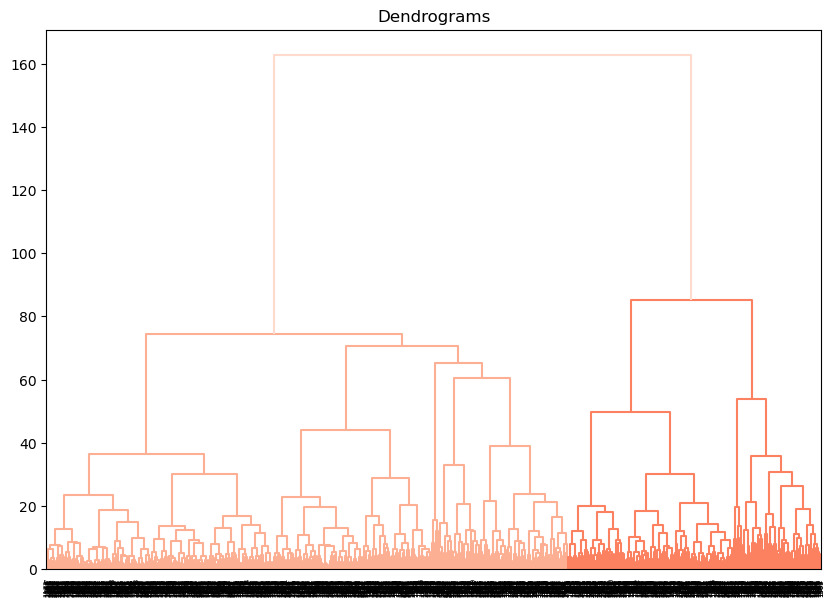

In [63]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(reduced_data, method='ward'))

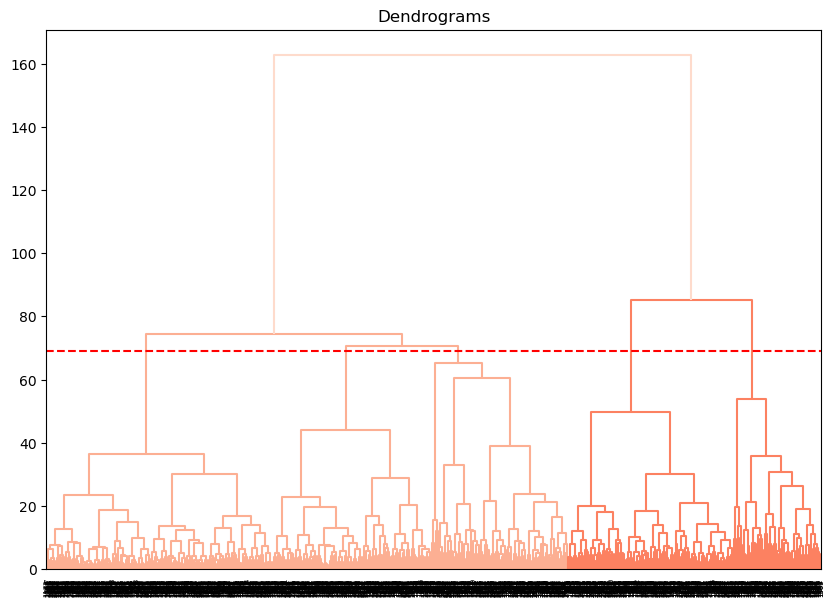

In [79]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(reduced_data, method='ward'))
plt.axhline(y=69, color='r', linestyle='--')

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(reduced_data)

array([2, 4, 2, ..., 0, 2, 0], dtype=int64)

In [91]:
data["Personality"]= cluster.labels_
dataCopy["Personality"]= cluster.labels_

In [92]:
data["Personality"].value_counts()

3    647
2    473
4    452
0    389
1    251
Name: Personality, dtype: int64

## 5.3. Algorithm Evaluation

To get a sense of whether our clustering algorithm provides reasonable results, we can look at the pie and bar plots of the clusters to see how they're distributed.

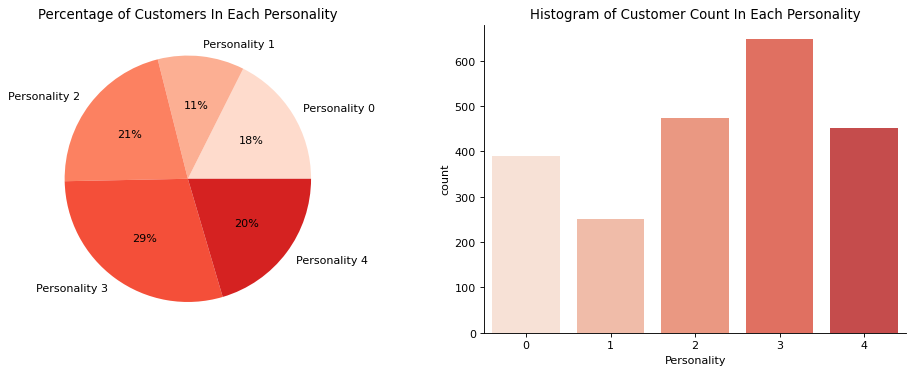

In [93]:
#define labels
labels = ['Personality 0', 'Personality 1','Personality 2', 'Personality 3','Personality 4']
counts= []

#compute counts
for i in range(5):
    counts.append(len(data[data["Personality"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

#bar plot
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histogram of Customer Count In Each Personality")
sns.countplot(x=data["Personality"], alpha=.9, ax=ax1)
sns.despine()

plt.show()


# 5.4. Data Analysis

It's time to find out the special characteristics of each cluster. To do that, we'll study their demographics and behaviors against different features.

## 5.4.1. Demographics

###  Age

To study the demographics of the different personality groups, we'll first take a look on their age distributions.

C:\Users\mnkre\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


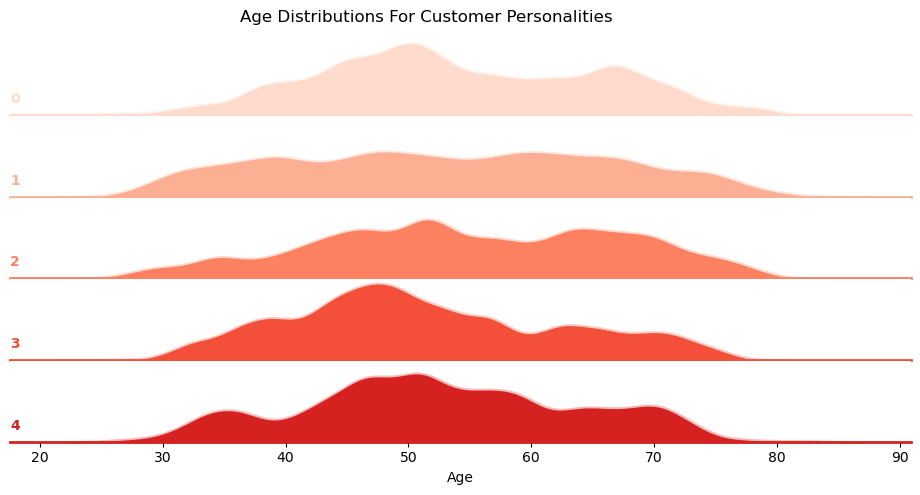

In [94]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5,alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Age, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Age")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.01)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Age Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Conclusion:


*   Personality 0: Has a wide and nearly even distribution, which show a diverse variation in age groups.
*   Personality 1: mainly consists of older people compared to other personalities

To validate this, let's calculate some stats.



In [149]:
#personality 0 age stats
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[(d["Age"]<55) & (d["Age"]>40)]))/len(d)*100
print("Percentage of customer between 40 and 55 in personality 0= {:.2f}% ".format(perc))

#personality 1 age stats
d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Age"]>50])/len(d))*100
print("Percentage of customer above 50 in personality 1= {:.2f}% ".format(perc))

#personality 2 age stats
d= dataCopy[dataCopy["Personality"]==2]
perc= (len(d[d["Age"]>45])/len(d))*100
print("Percentage of customer above 45 in personality 2= {:.2f}% ".format(perc))

#personality 3 age stats
d= dataCopy[dataCopy["Personality"]==3]
perc= (len(d[(d["Age"]<60) & (d["Age"]>40)]))/len(d)*100
print("Percentage of customer between 40 and 60 in personality 3= {:.2f}% ".format(perc))

#personality 4 age stats
d= dataCopy[dataCopy["Personality"]==4]
perc= (len(d[d["Age"]<55])/len(d))*100
print("Percentage of customer below 55 in personality 4= {:.2f}% ".format(perc))

Percentage of customer between 40 and 55 in personality 0= 44.73% 
Percentage of customer above 50 in personality 1= 54.98% 
Percentage of customer above 45 in personality 2= 76.74% 
Percentage of customer between 40 and 60 in personality 3= 58.11% 
Percentage of customer below 55 in personality 4= 58.41% 


###  Family Breakdown

To analyze based on family shape, we'll consider 2 aspects; the family size and the number of children.

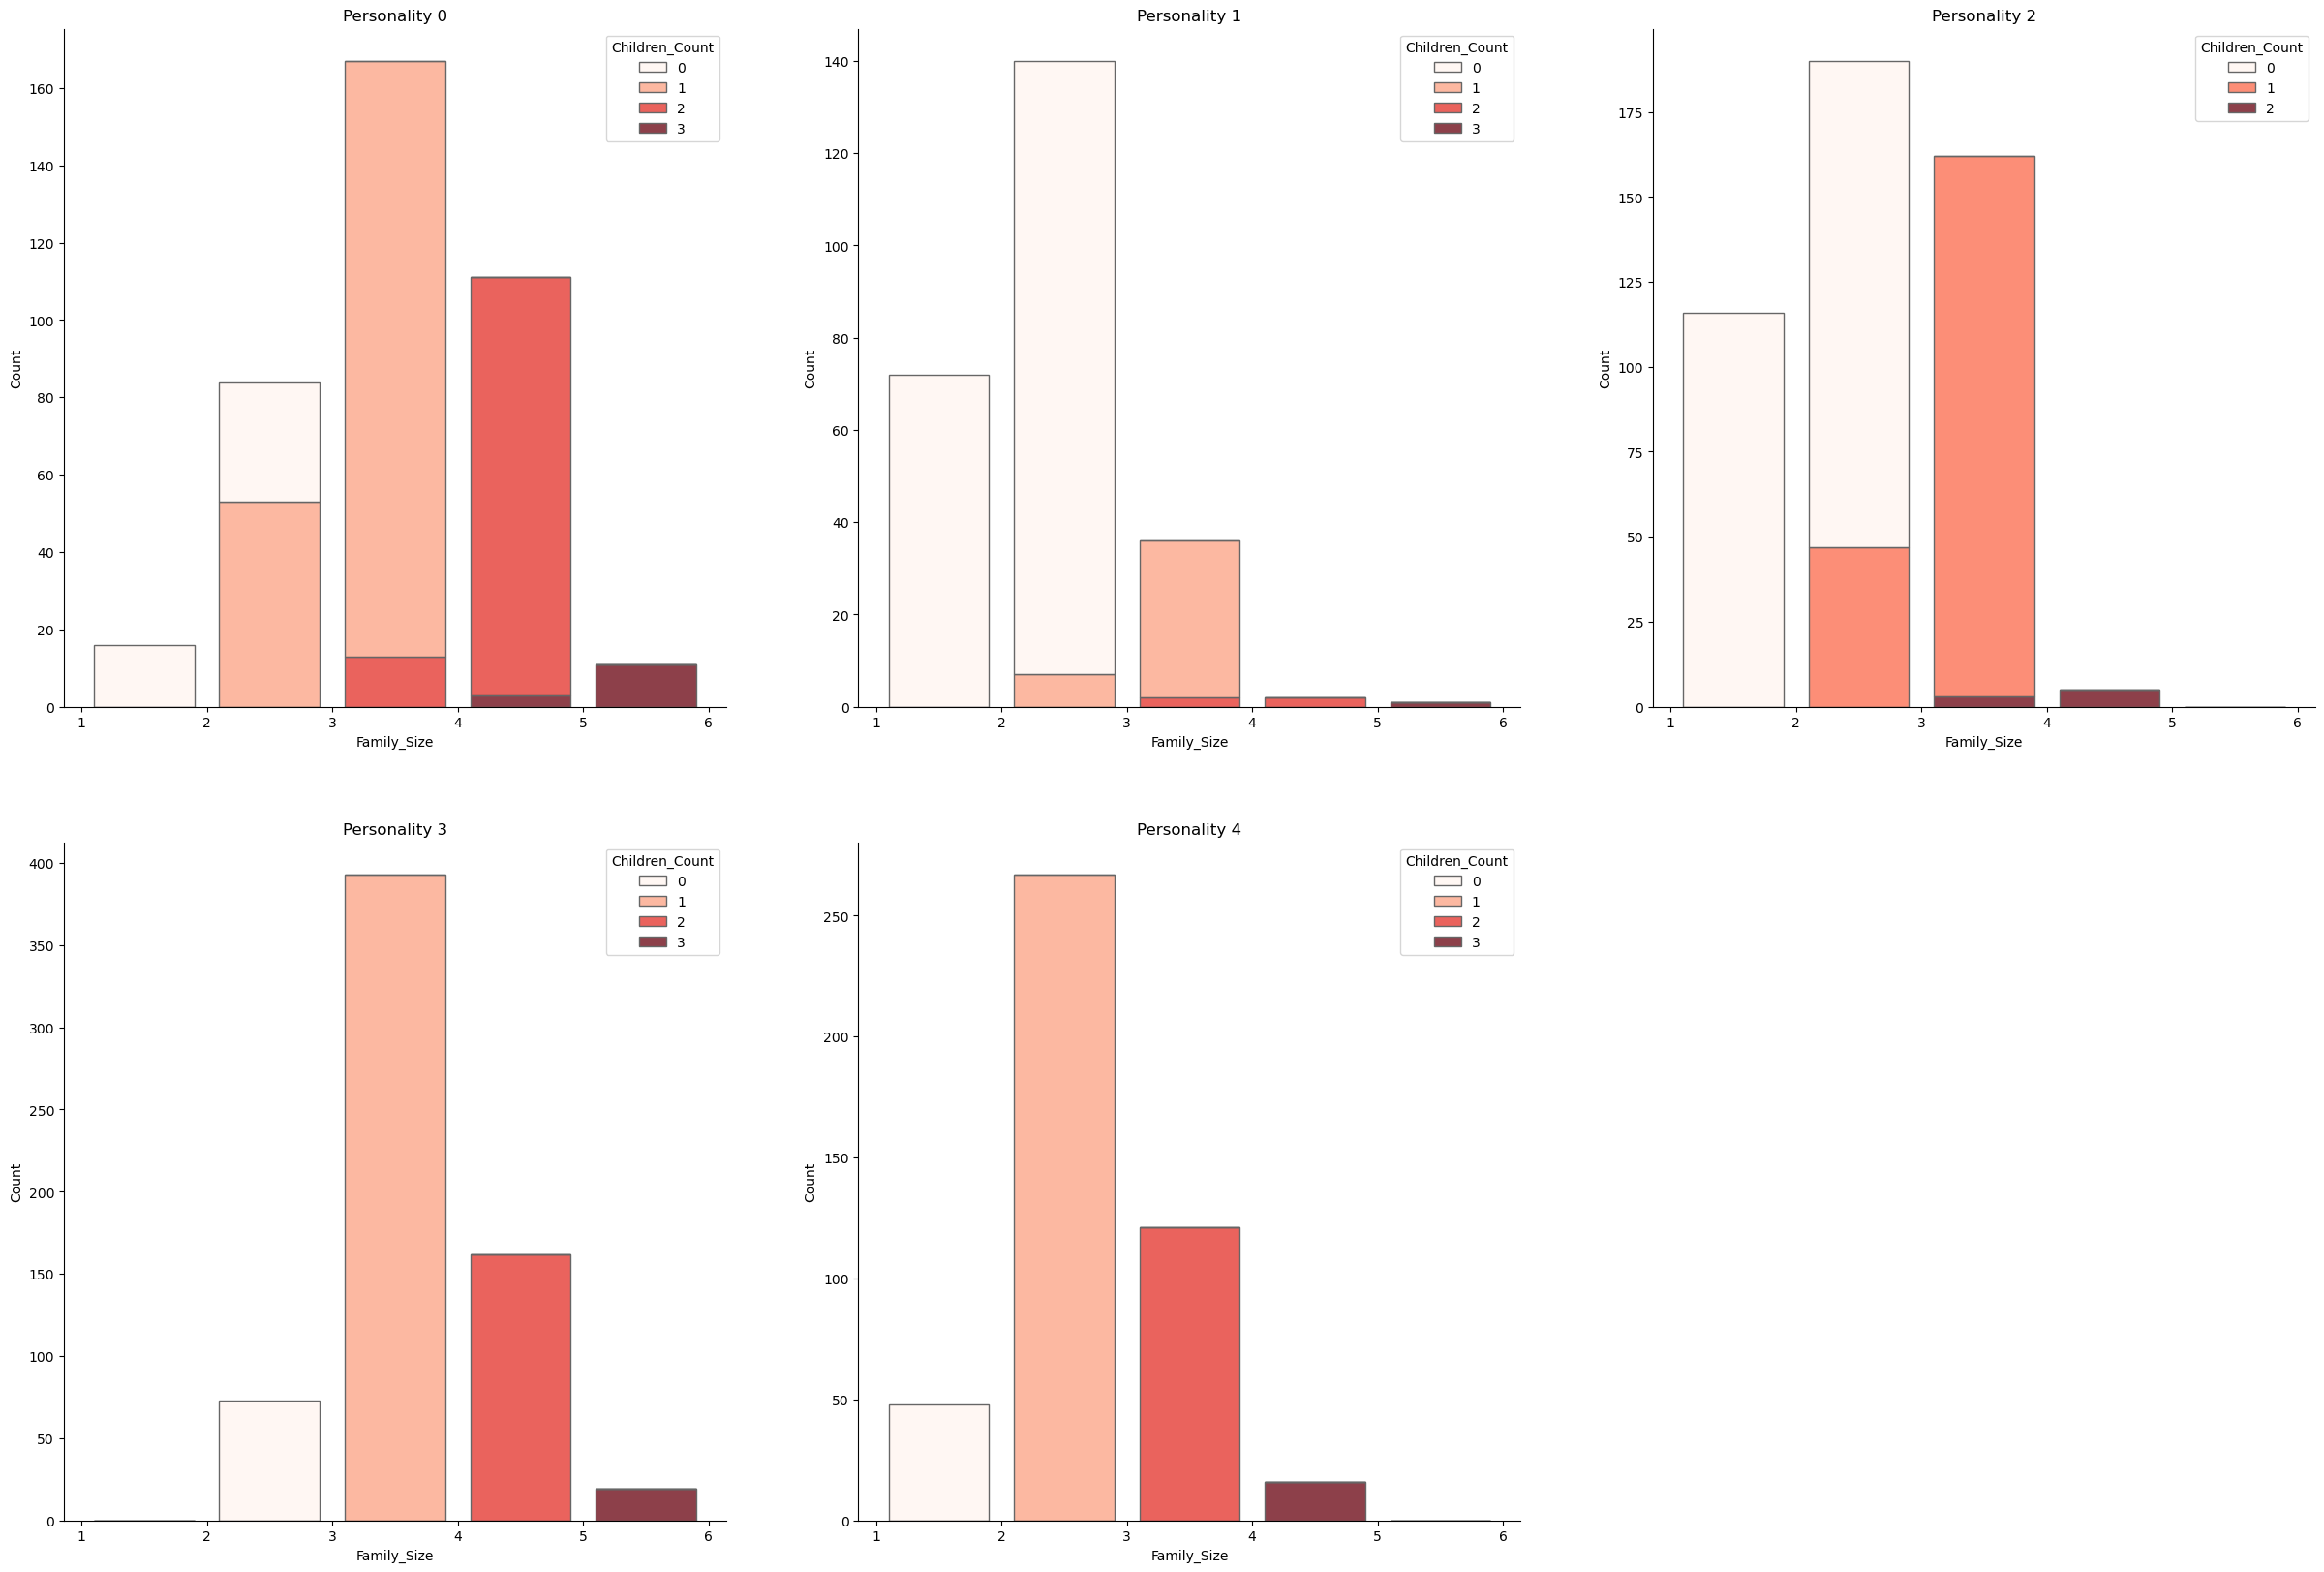

In [117]:
plt.figure(figsize=(30, 20))

#plotting a histogram of family size showing children count in each bin
for i in range(5):
    if(i>2):
        ax1 = plt.subplot2grid((2,3),(1,i-3))
    else:
        ax1 = plt.subplot2grid((2,3),(0,i))
    ax1.set_title("Personality "+str(i))
    sns.histplot(
      dataCopy[dataCopy["Personality"]==i],
      x="Family_Size",
      hue="Children_Count",
      multiple="stack",
      palette="Reds",
      edgecolor=".4",
      bins= list(range(1,7)),
      shrink= .8
  )
    sns.despine()


In [111]:
dataCopy[dataCopy["Personality"]==0]["Family_Size"].value_counts()

3    167
4    111
2     84
1     16
5     11
Name: Family_Size, dtype: int64

Conclusion:

1.   Personality 0:
  *  The majority of customers have 1-2 kids and a partner.
  *  A considerable percentage are single parents.
2.   Personality 1:
  *  The vast majority have 0 kids, followed by 1 kid.
  *  A considerable percentage are living alone.
  *  A considerable percentage are single parents. 

Time for some stats.

In [63]:
#personality 0 kids stats
d= dataCopy[dataCopy["Personality"]==0]
perc= ((len(d[d["Children_Count"]==1]) + len(d[d["Children_Count"]==2]))/len(d))*100
print("Percentage of customers having 1-2 kids in personality 0 = {:.2f}% ".format(perc))

#personality 1 kids stats
d= dataCopy[dataCopy["Personality"]==1]
perc= ((len(d[d["Children_Count"]==0]))/len(d))*100
print("Percentage of customers having 0 kids in personality 1 = {:.2f}% ".format(perc))
perc= ((len(d[d["Children_Count"]==1]))/len(d))*100
print("Percentage of customers having 1 kids in personality 1 = {:.2f}% ".format(perc))
perc= ((len(d[d["Family_Size"]==1]))/len(d))*100
print("Percentage of customers living alone personality 1= {:.2f}% ".format(perc))

Percentage of customers having 1-2 kids in personality 0 = 85.60% 
Percentage of customers having 0 kids in personality 1 = 54.65% 
Percentage of customers having 1 kids in personality 1 = 41.32% 
Percentage of customers living alone personality 1= 22.51% 


In [64]:
#single parents in personality 0
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 0= {:.2f}% ".format(perc))

#single parents in personality 1
d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 1= {:.2f}% ".format(perc))

Percentage of single parents belonging to personality 0= 56.12% 
Percentage of single parents belonging to personality 1= 43.88% 


In [73]:
d

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0         Graduate         Single  58138.0       58       635         88   
2         Graduate          Taken  71613.0       26       426         49   
5     Postgraduate          Taken  62513.0       16       520         42   
6         Graduate         Single  55635.0       34       235         65   
12        Graduate         Single  63033.0       82       194         61   
...            ...            ...      ...      ...       ...        ...   
2224  Postgraduate         Single  57642.0       24       580          6   
2231  Postgraduate         Single  44802.0       71       853         10   
2235      Graduate          Taken  61223.0       46       709         43   
2237      Graduate         Single  56981.0       91       908         48   
2238  Postgraduate          Taken  69245.0        8       428         30   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
2                 127              111                21            42  ...   
5                  98                0                42            14  ...   
6                 164               50                49            27  ...   
12                480              225               112            30  ...   
...               ...              ...               ...           ...  ...   
2224               58                8                 0            27  ...   
2231              143               13                10            20  ...   
2235              182               42               118           247  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   

      Complain  Response  Age  Children_Count  Family_Size  Customer_For  \
0            0         1   65               0            1          3532   
2            0         0   57               0            2          3181   
5            0         0   55               1            3          3162   
6            0         0   51               1            2          3462   
12           0         0   63               0            1          3095   
...        ...       ...  ...             ...          ...           ...   
2224         0         0   52               1            2          3040   
2231         0         0   52               0            1          3546   
2235         0         0   55               1            3          3250   
2237         0         0   41               0            1          3024   
2238         0         0   66               1            3          3025   

      Spendings  Purchases  Accepted_Campaigns  Personality  
0          1617         25                   0            1  
2           776         21                   0            1  
5           716         22                   0            1  
6           590         21                   0            1  
12         1102         16                   0            1  
...         ...        ...                 ...          ...  
2224        679         22                   1            1  
2231       1049         27                   0            1  
2235       1341         18                   0            1  
2237       1241         19                   1            1  
2238        843         23                   0            1  

[893 rows x 30 columns]

###  Education

Next, we will examine the educational level of the different customer personalities using a histogram.

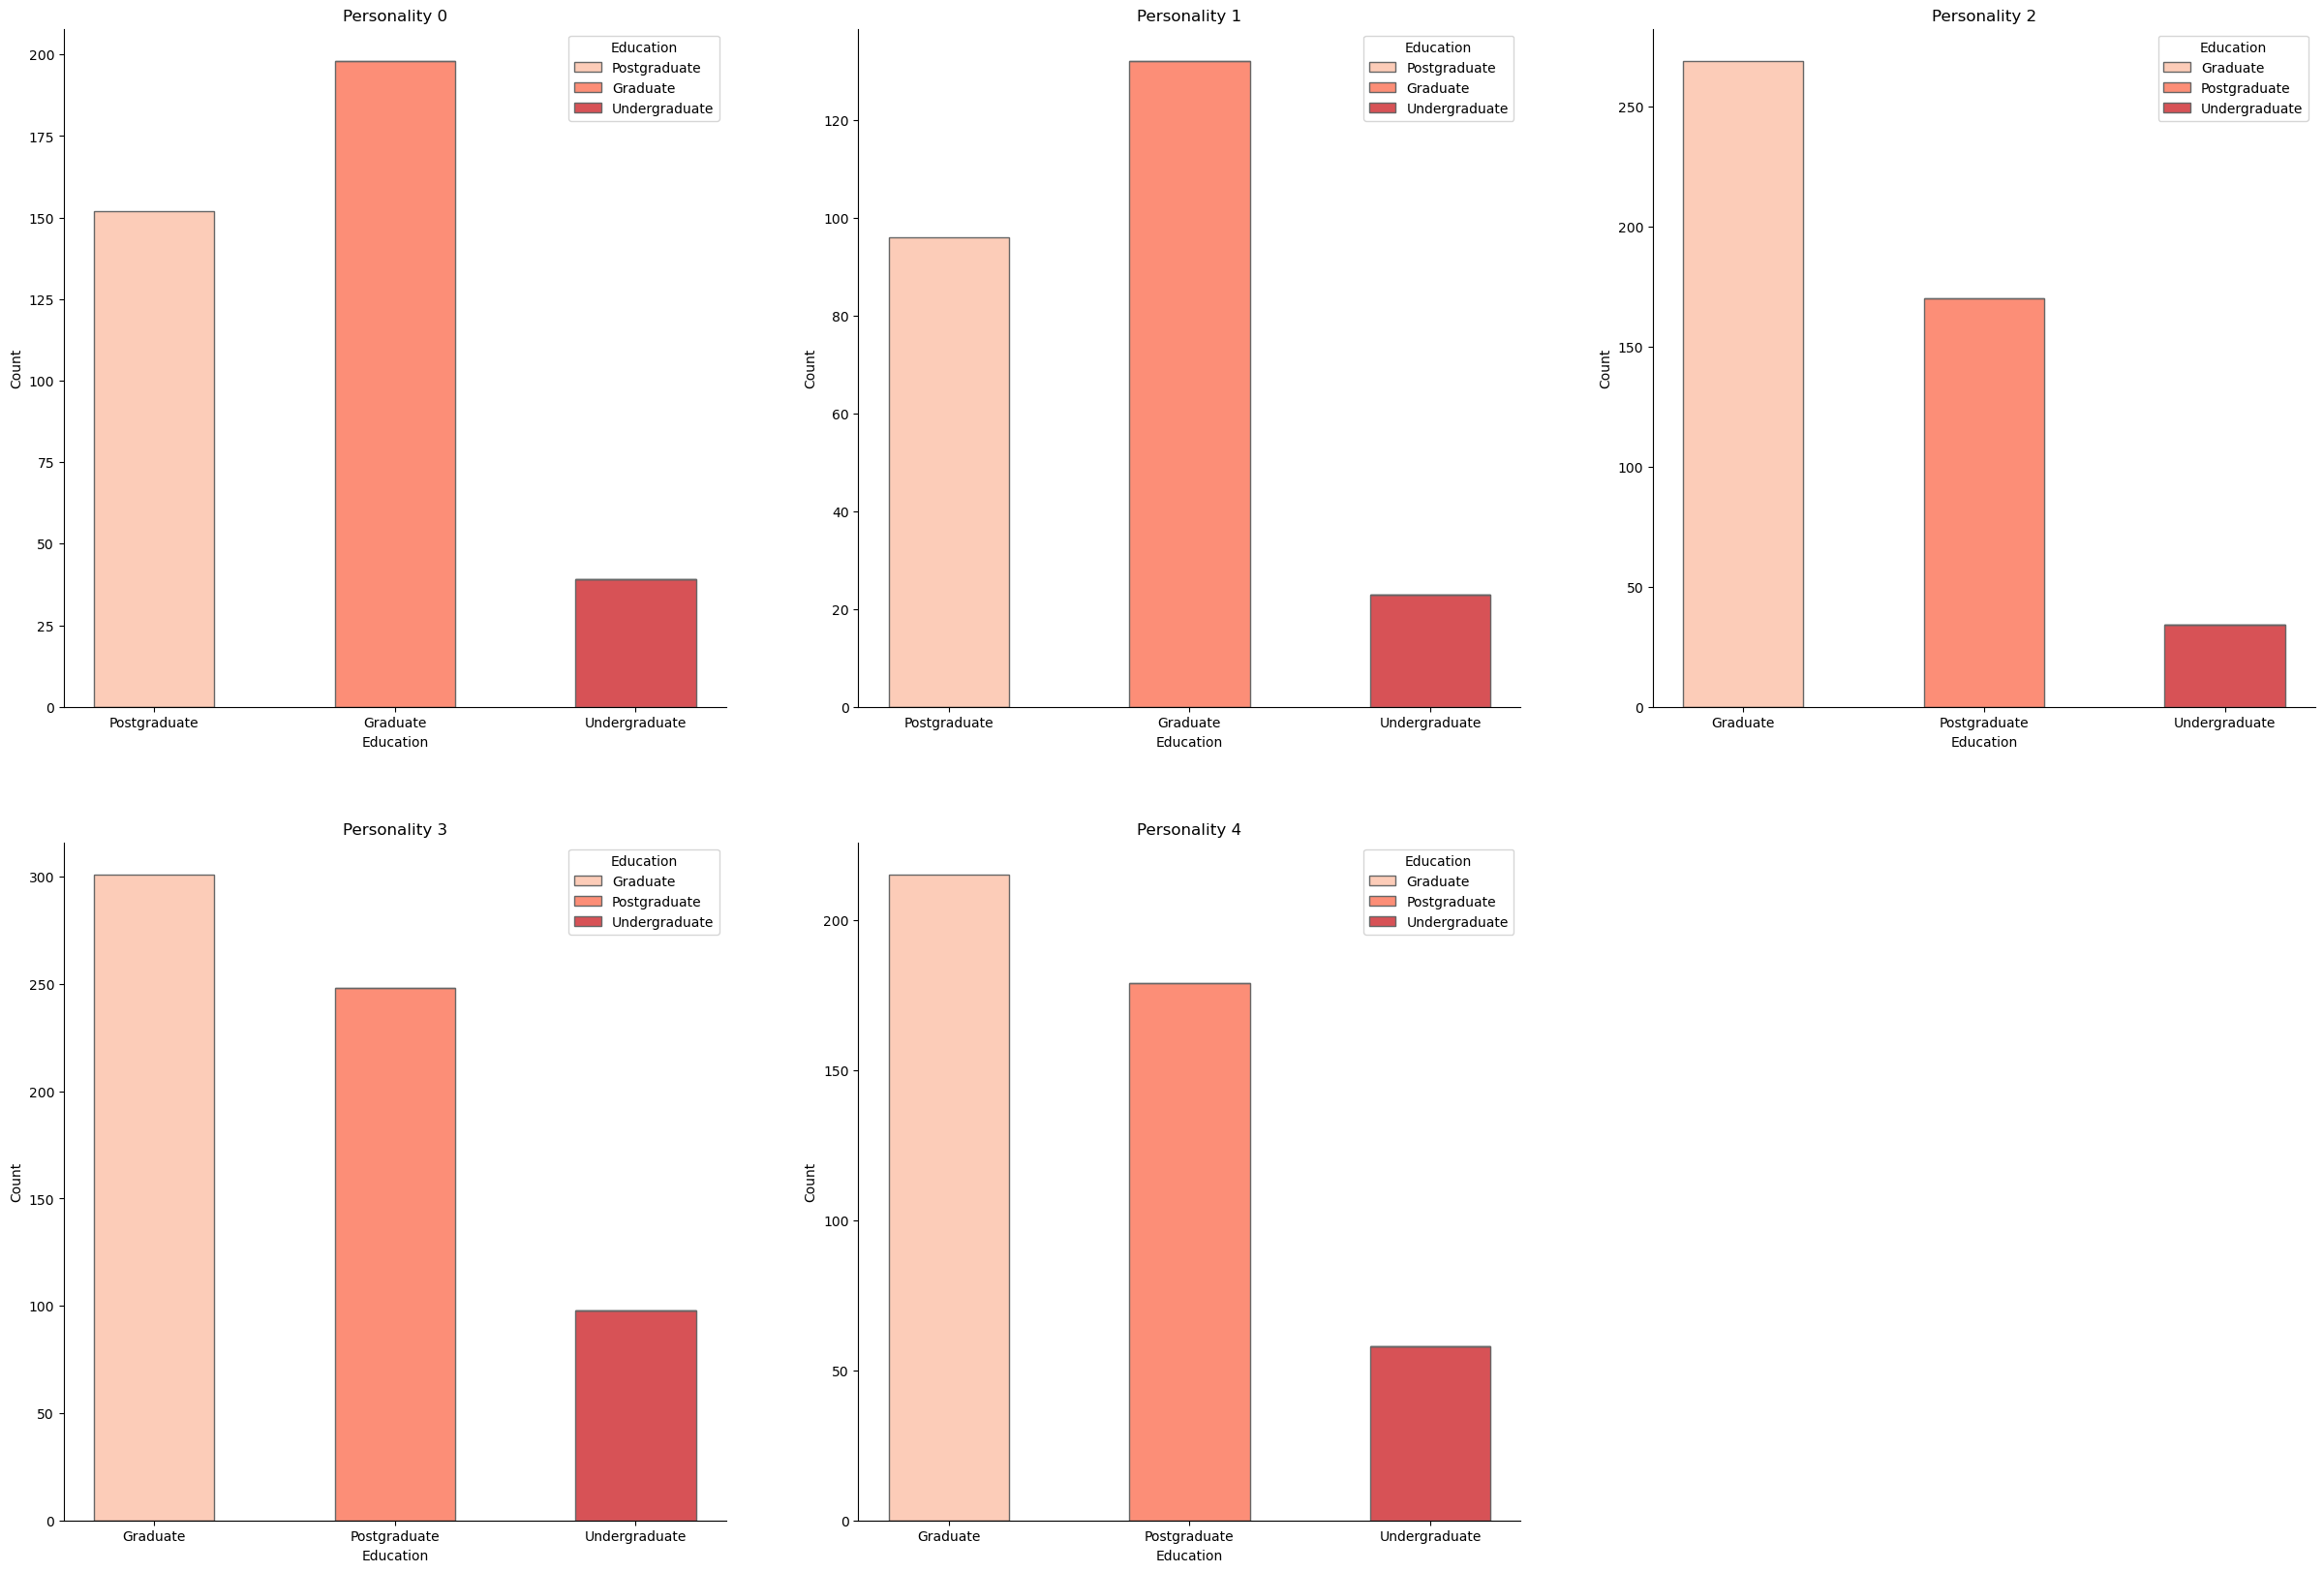

In [120]:
plt.figure(figsize=(30,20))

#plotting a histogram of family size showing children count in each bin
for i in range(5):
    if(i>2):
        ax1 = plt.subplot2grid((2,3),(1,i-3))
    else:
        ax1 = plt.subplot2grid((2,3),(0,i))
    ax1.set_title("Personality "+str(i))
    sns.histplot(
        dataCopy[dataCopy["Personality"]==i],
        x="Education",
        hue= "Education",
        multiple="stack",
        palette="Reds",
        edgecolor=".4",
        shrink= .5
    )
    sns.despine()

Conclusion:


*   Personalities 0 & 1 have very similar education distributions.
*   The education distributions don't really help in differentiating between the different segments.





###  Income

Now we'll visualize the income distributions of the different segments.

C:\Users\mnkre\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


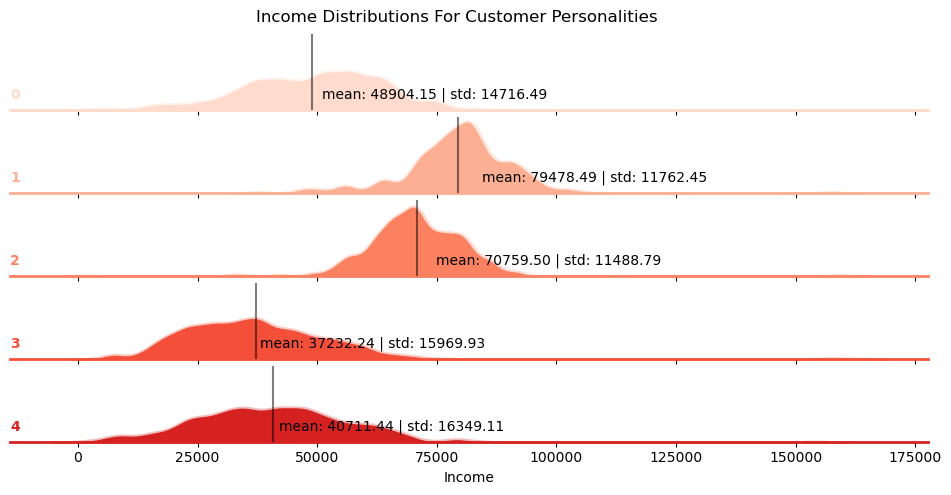

In [121]:
# Initialize the FacetGrid object
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  # palette=palette
                  )

# Draw the densities in a few steps
g.map(sns.kdeplot, "Income",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Income", clip_on=False, color="w", lw=2, bw_adjust=.5, alpha=.7)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(Income, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Income")

# Add vertical lines for mean age on each plot
def vertical_mean_line_survived(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="-", 
                color = "black", alpha=.5)
    txkw = dict(size=10, color = "black")
    tx = "mean: {:.2f} | std: {:.2f}".format(x.mean(),x.std())
    ax = plt.gca()
    ax.text(0.06+x.mean()/175000, .2, tx, color="black", size= 10,
            ha="left", va="center", transform=ax.transAxes)
    # plt.text(x.mean()+1, 0.0052, tx, **txkw)

g.map(vertical_mean_line_survived, 'Income')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap
g.fig.suptitle('Income Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Conclusion:

1.   Personality 0 (Low):
  *   Low average income group
2.   Personality 1 (High):
  *  High average income group

## 5.4.2. Business Related

We will focus here on the business-related aspect of the customer's personality to get more insights.

### Products Breakdown

We will use a simple pie chart to visualize the types of products frequently bought by the customers.

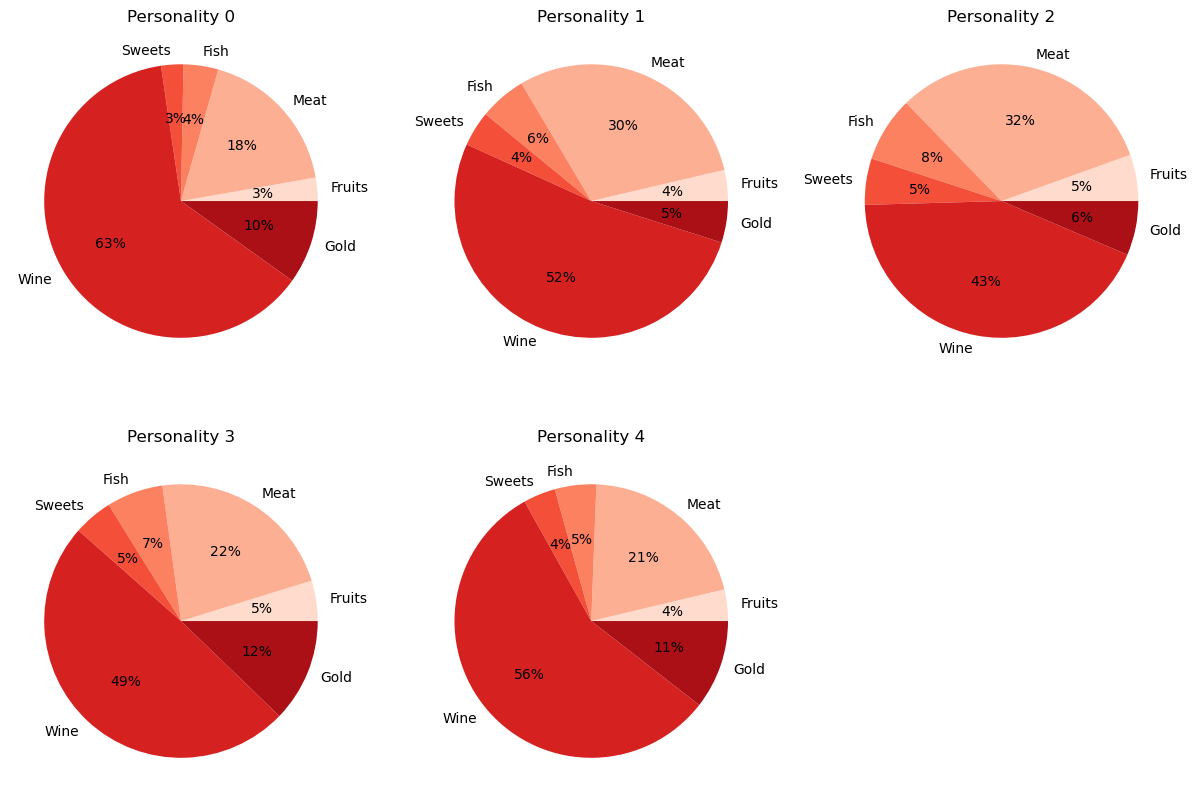

In [125]:
#define labels
labels = ['Fruits', 'Meat', 'Fish', 'Sweets', 'Wine', 'Gold']
plt.figure(figsize=(15, 10), dpi=100)

#compute counts
for i in range(5):
    counts= []
    #getting the data of the current segment
    d= dataCopy[dataCopy["Personality"]==i]

    #computing counts
    counts.append(d["MntFruits"].sum())
    counts.append(d["MntMeatProducts"].sum())
    counts.append(d["MntFishProducts"].sum())
    counts.append(d["MntSweetProducts"].sum())
    counts.append(d["MntWines"].sum())
    counts.append(d["MntGoldProds"].sum())

    #plotting chart
    if(i>2):
        ax1 = plt.subplot2grid((2,3),(1,i-3))
    else:
        ax1 = plt.subplot2grid((2,3),(0,i))
    ax1.set_title("Personality "+str(i))
    plt.pie(counts, labels = labels, autopct='%.0f%%')

plt.show()

From the above plots, we can see that:
*  The percentage of spendings on primary goods such as fruits, fish and sweets is very close across all segments.
* Personality 0 spends relatively more on gold.
* Personality 1 spends relatively more on meat.


###  Spendings

To examine the value added by the customers, we will plot the purchases against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

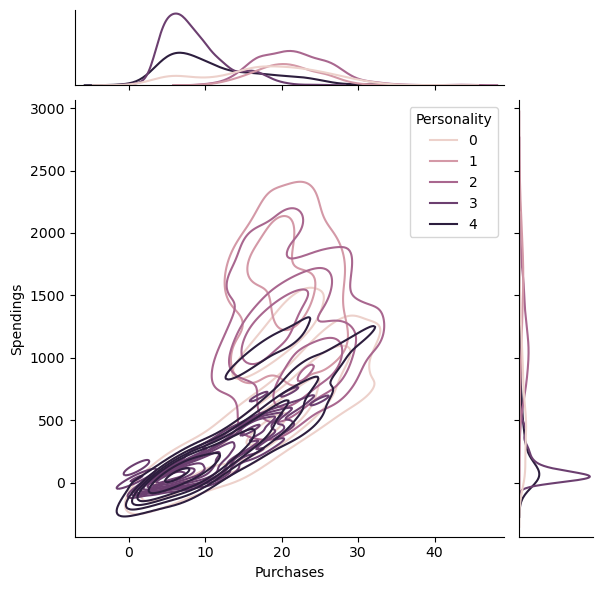

In [134]:
# Show the joint distribution using kernel density estimation
plt.figure(figsize=(5, 5), dpi=80)
#sns.lineplot(data=dataCopy, x="year", y="passengers")
g = sns.jointplot(data=dataCopy, x="Purchases", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Few purchases, low spendings.
2.   Personality 1: Relatively higher spendings, meaning that they buy more expensive products. 

We will also plot the family size against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

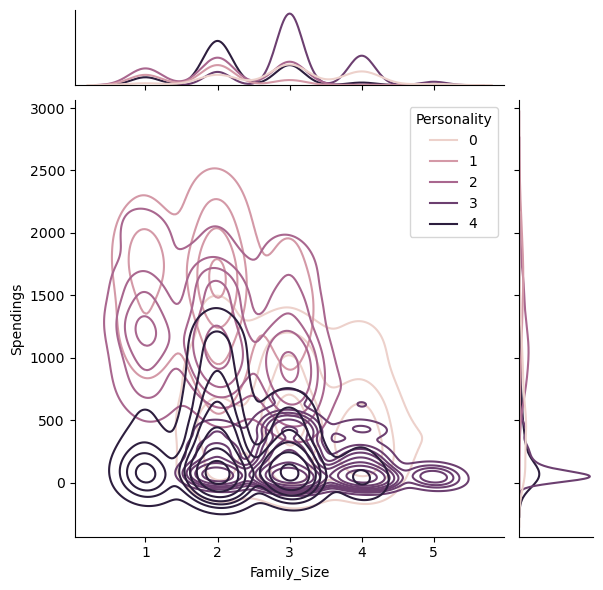

In [135]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Family_Size", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Family_size 3 has more spendings.
2.   Personality 1: Family_size 1&2 has more spendings. 



We will now plot the customer_for against the spendings for each segment.

<Figure size 400x400 with 0 Axes>

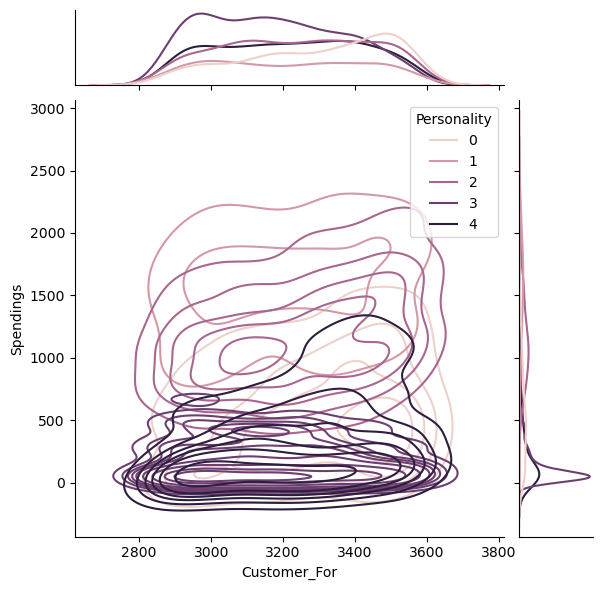

In [136]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Customer_For", y="Spendings", hue="Personality",kind="kde")
sns.despine()

Conclusion:
1.   Personality 0: Spent is almost constant.
2.   Personality 1: Spent more as they stay for more time. 



## 5.4.3. Behavioural

###  Response To Campaigns

Finally, we will examine the customer's reactions to the company's campaigns in terms of how many campaigns have they accepted.

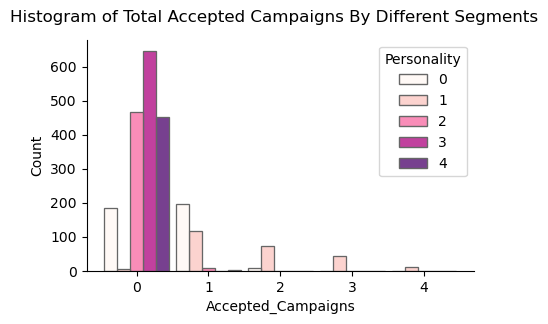

In [138]:
f= plt.figure(figsize=(5, 3))
f.suptitle("Histogram of Total Accepted Campaigns By Different Segments")
sns.histplot(dataCopy, x="Accepted_Campaigns", hue= "Personality", multiple="dodge", palette="RdPu", edgecolor=".4", discrete= True, shrink= .9)
sns.despine()

Conclusion:

*   Personalities 0 & 1: Majority accepted 0 campaigns. Very few accepted only 1.
*   Personality 1: Some accepted 3 or 4.



In [111]:
from sklearn.cluster import DBSCAN

In [74]:
 reduced_data.describe()

0             1             2             3             4   \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean  -2.158209e-16 -3.091760e-17 -4.135731e-17  3.663937e-17  6.926346e-18   
std    2.978004e+00  1.639531e+00  1.594313e+00  1.457830e+00  1.195582e+00   
min   -5.261721e+00 -5.769427e+00 -3.704392e+00 -3.811613e+00 -3.768273e+00   
25%   -2.667970e+00 -1.127895e+00 -8.676337e-01 -1.147637e+00 -7.673842e-01   
50%   -8.389851e-01  1.626787e-02 -7.422809e-02 -1.229070e-01 -6.693170e-02   
75%    2.386549e+00  1.088683e+00  4.957196e-01  9.681237e-01  6.958646e-01   
max    9.210267e+00  6.021394e+00  9.670190e+00  5.458860e+00  4.222518e+00   

                 5             6             7             8             9   \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   4.717946e-18  5.109435e-17 -6.078120e-17  3.995589e-17 -5.069282e-17   
std    1.068784e+00  1.036891e+00  1.006821e+00  9.914083e-01  9.365929e-01   
min   -3.963913e+00 -3.086085e+00 -2.747343e+00 -2.214192e+00 -3.820125e+00   
25%   -5.993250e-01 -7.041750e-01 -4.671605e-01 -6.835102e-01 -5.132743e-01   
50%    1.323209e-02 -3.972817e-02 -5.743236e-02 -1.123112e-01 -5.103450e-03   
75%    6.835247e-01  7.065012e-01  4.352719e-01  5.552769e-01  4.925032e-01   
max    4.006406e+00  4.340312e+00  8.389212e+00  8.431555e+00  5.565625e+00   

                 10            11            12            13            14  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   1.074086e-17 -1.470594e-17 -4.015273e-19  1.919802e-17  2.538405e-17   
std    9.332742e-01  8.852466e-01  8.681422e-01  7.932550e-01  7.810324e-01   
min   -2.727936e+00 -2.794157e+00 -4.358173e+00 -3.009801e+00 -3.174194e+00   
25%   -6.139650e-01 -4.864595e-01 -3.712621e-01 -3.537000e-01 -4.173868e-01   
50%    2.069188e-02 -7.659720e-02  1.008108e-02  3.831338e-02 -1.808667e-02   
75%    6.366765e-01  4.293075e-01  3.798903e-01  3.310418e-01  3.329558e-01   
max    3.646314e+00  5.818129e+00  8.429697e+00  4.946505e+00  3.855413e+00   

                 15            16            17            18            19  
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  
mean  -5.343764e-17 -2.835787e-17  4.316419e-18  3.046588e-17 -1.412874e-17  
std    7.573986e-01  7.378284e-01  6.939330e-01  6.647058e-01  6.505448e-01  
min   -4.381321e+00 -2.687005e+00 -2.465144e+00 -2.742301e+00 -2.954574e+00  
25%   -3.414453e-01 -4.716105e-01 -4.055078e-01 -3.761736e-01 -2.531366e-01  
50%   -5.250568e-02 -3.010378e-02 -1.467410e-02  5.911017e-03 -1.853121e-03  
75%    2.709041e-01  4.340101e-01  3.570914e-01  3.531121e-01  2.389470e-01  
max    4.649447e+00  4.253897e+00  5.719162e+00  3.292466e+00  5.868493e+00

In [112]:
from sklearn.metrics import pairwise

d = pairwise.pairwise_distances(reduced_data, metric="euclidean")
d1 = pd.DataFrame(d, columns=reduced_data.index, index=reduced_data.index)

In [113]:
d1.mean().mean()

7.150392824522905

In [176]:
from itertools import product

#from itertools import product

eps_values = np.arange(2,6,0.1) # eps values is mean distance of whole dataframe
min_samples = np.arange(10,20) # min_sample is root of sample numbers
DBSCAN_params = list(product(eps_values, min_samples))


In [107]:
DBSCAN_params

[(4.0, 45),
 (4.0, 46),
 (4.0, 47),
 (4.0, 48),
 (4.0, 49),
 (4.1, 45),
 (4.1, 46),
 (4.1, 47),
 (4.1, 48),
 (4.1, 49),
 (4.199999999999999, 45),
 (4.199999999999999, 46),
 (4.199999999999999, 47),
 (4.199999999999999, 48),
 (4.199999999999999, 49),
 (4.299999999999999, 45),
 (4.299999999999999, 46),
 (4.299999999999999, 47),
 (4.299999999999999, 48),
 (4.299999999999999, 49),
 (4.399999999999999, 45),
 (4.399999999999999, 46),
 (4.399999999999999, 47),
 (4.399999999999999, 48),
 (4.399999999999999, 49),
 (4.499999999999998, 45),
 (4.499999999999998, 46),
 (4.499999999999998, 47),
 (4.499999999999998, 48),
 (4.499999999999998, 49),
 (4.599999999999998, 45),
 (4.599999999999998, 46),
 (4.599999999999998, 47),
 (4.599999999999998, 48),
 (4.599999999999998, 49),
 (4.6999999999999975, 45),
 (4.6999999999999975, 46),
 (4.6999999999999975, 47),
 (4.6999999999999975, 48),
 (4.6999999999999975, 49),
 (4.799999999999997, 45),
 (4.799999999999997, 46),
 (4.799999999999997, 47),
 (4.7999999999999

In [177]:
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(reduced_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(reduced_data, DBS_clustering.labels_))

In [109]:
no_of_clusters

[2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

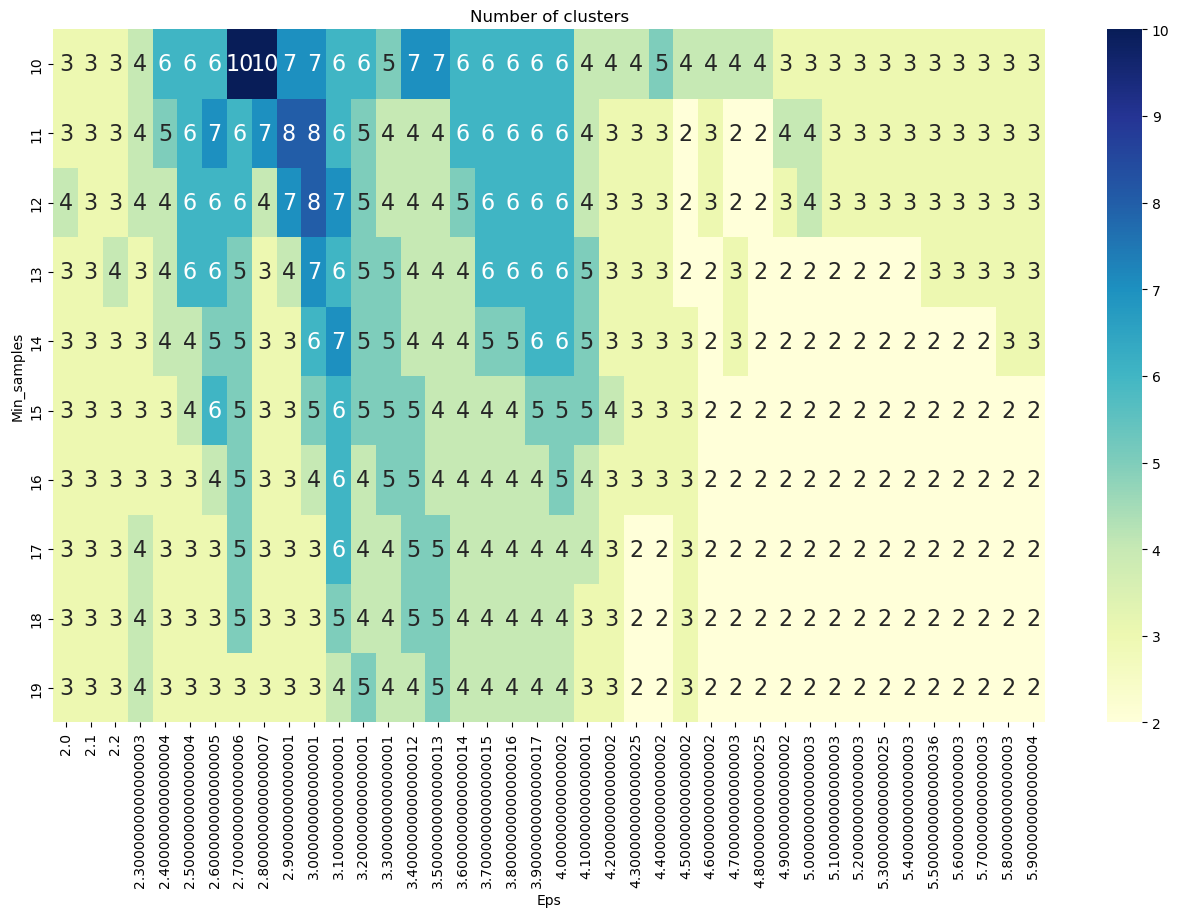

In [178]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

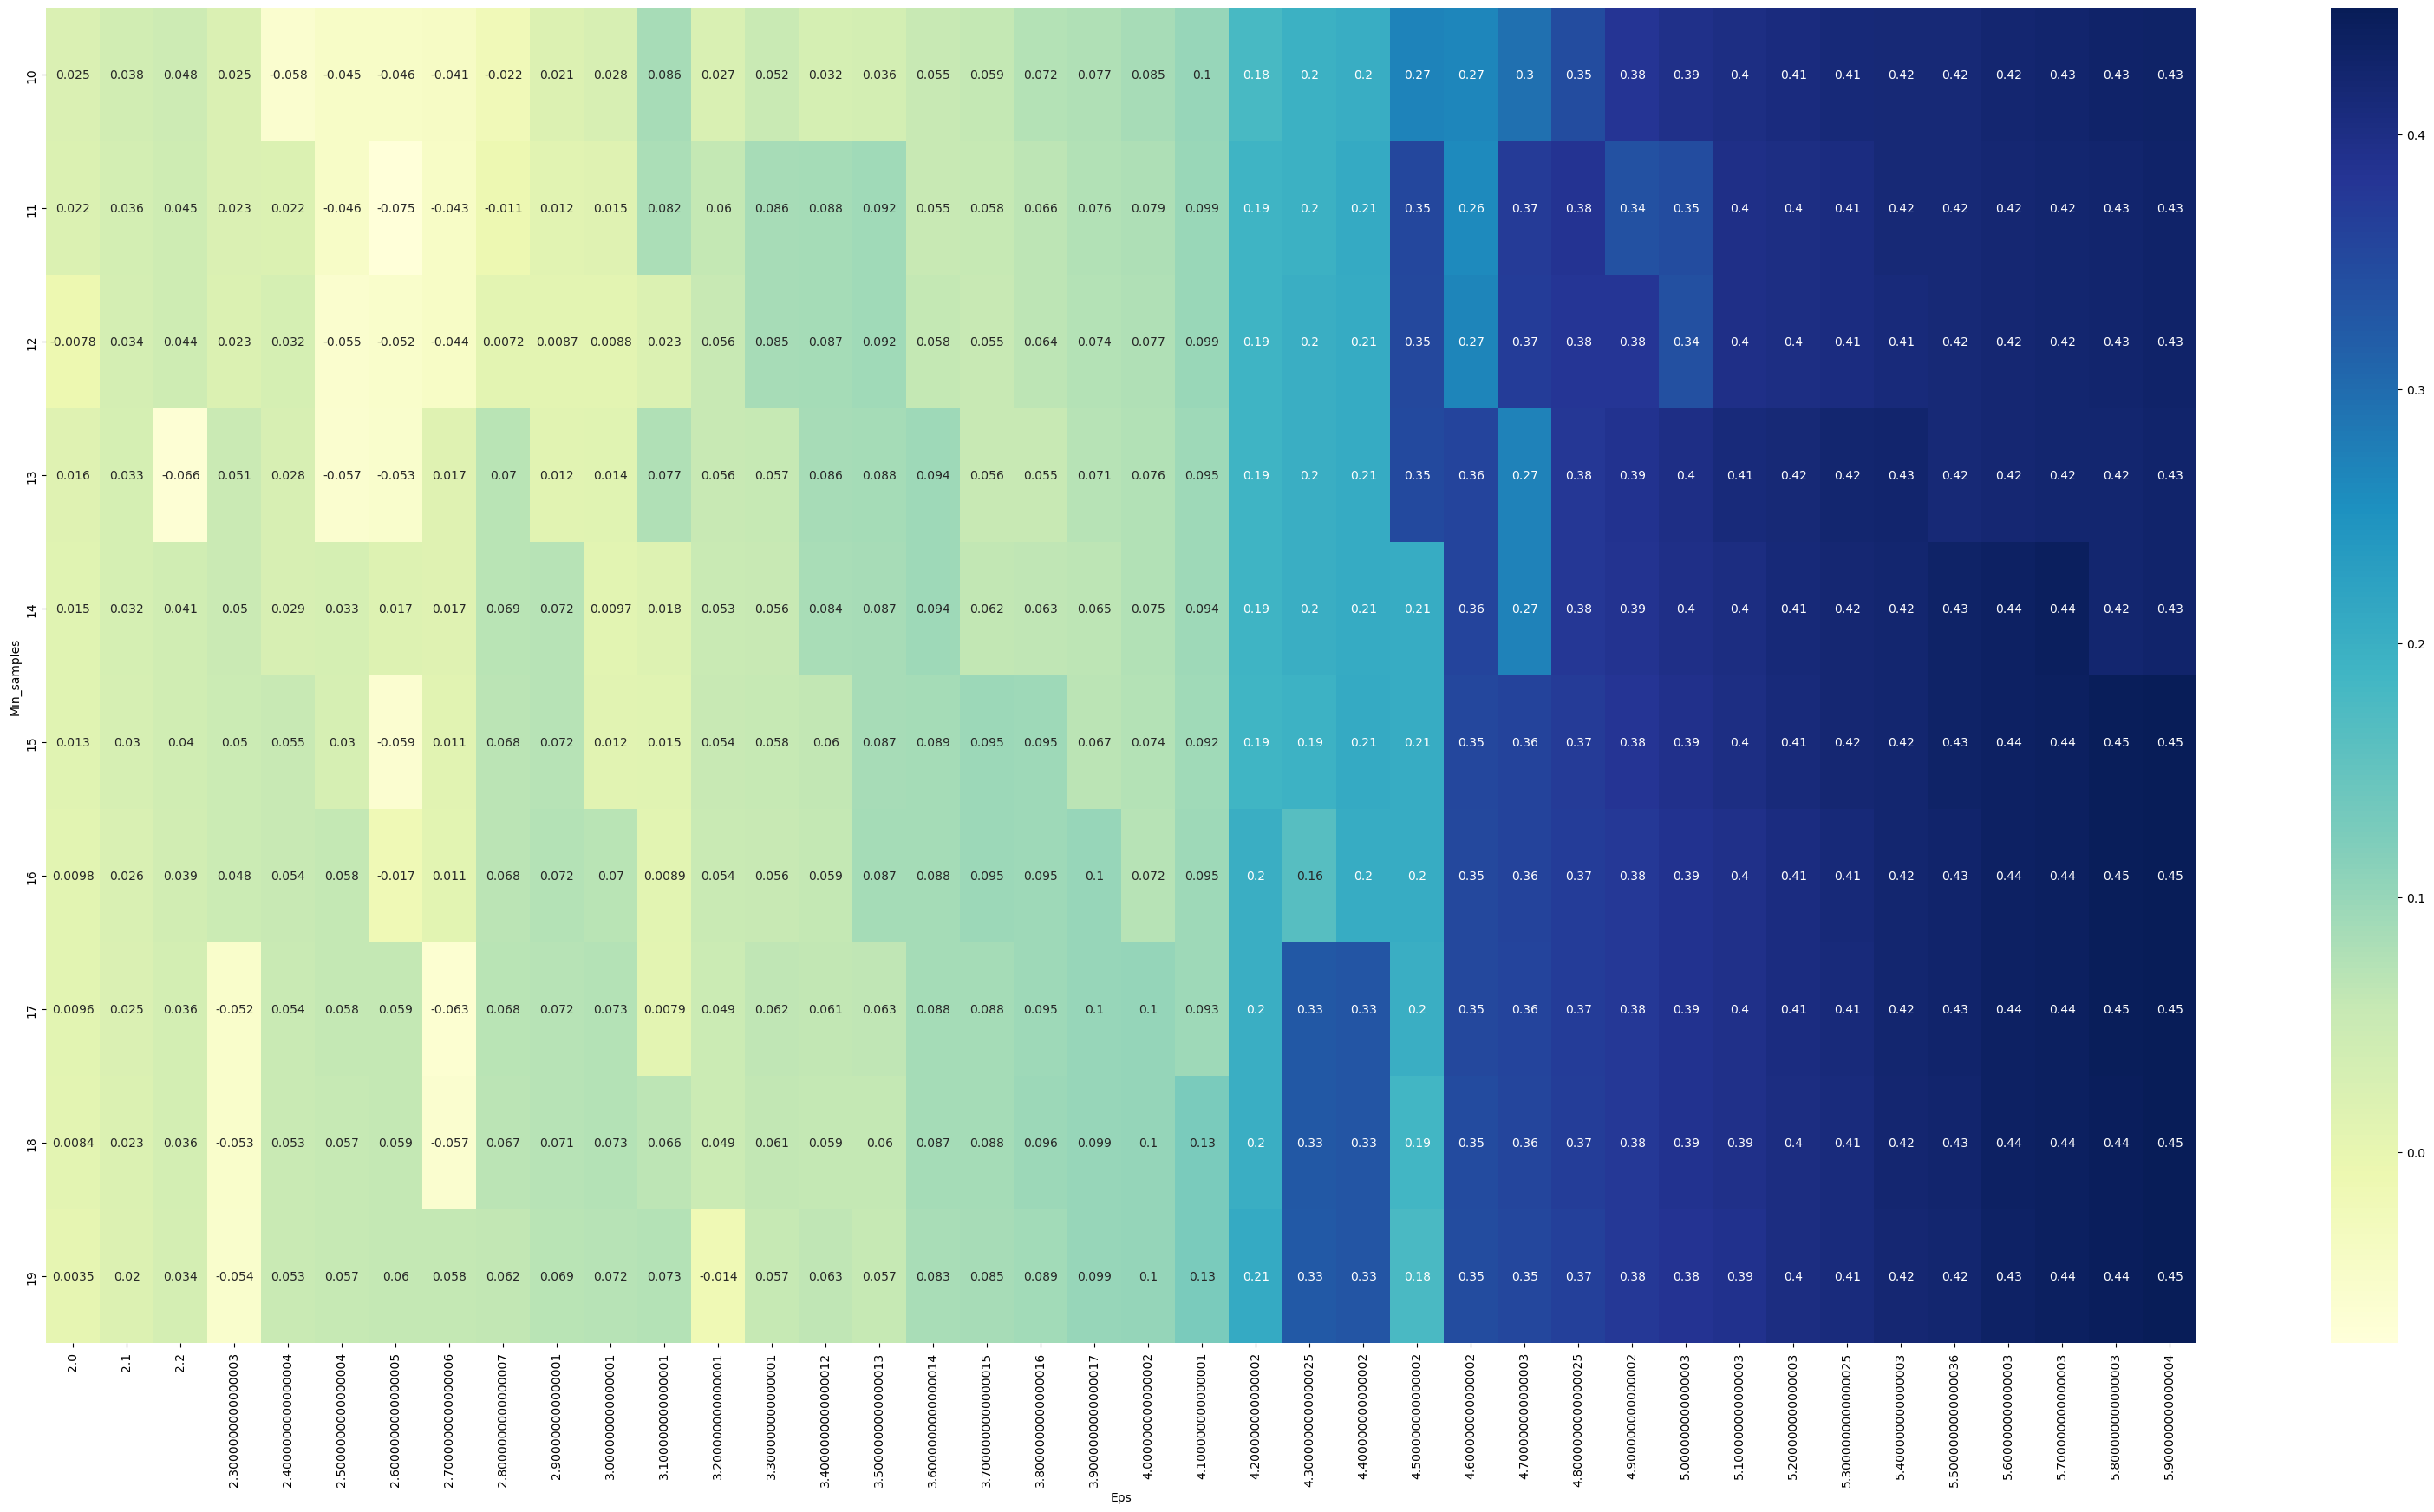

In [179]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [180]:
DBS_clustering = DBSCAN(eps=4.4, min_samples=10).fit(reduced_data)

DBSCAN_clustered = reduced_data.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [181]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1               203
 0              1949
 1                10
 2                14
 3                36

In [154]:
DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

0         1         2         3         4         5         6  \
20    3.477721  3.553286 -0.871266  1.289901  1.273094 -0.792308  0.380183   
72   -2.753403 -1.397234 -0.342970 -2.013712  1.109590  0.445397  0.611575   
136  -3.402553 -0.298419  0.257989 -1.225854  1.080808  0.002227  3.421083   
153   4.485864  3.577137 -1.059517 -0.043577 -1.527318 -1.948151  0.344177   
258  -2.466827 -1.931428 -0.829974  0.855907  0.113664 -0.847318  1.725664   
339  -3.203705 -1.253673 -0.361688  1.047237 -0.192784 -1.304349  3.488926   
342   0.812165  0.409888 -0.858674 -1.261644 -0.805870 -0.370661  1.946769   
574  -2.314468 -2.388547  0.025824  1.861986  2.049199  0.182678  2.177354   
671   6.241541  3.356348 -1.526339  0.764710  0.587860 -0.708103 -1.346184   
806   1.611812 -3.184827  2.812644  1.637051 -1.701283  0.104265 -1.092349   
904  -2.295179 -0.894695  5.542230 -1.130258 -0.624932 -1.919425  0.356141   
956  -3.061657  0.480475  0.336226  0.027705  2.470737  1.130056  1.046459   
1025 -3.411831  1.705021  0.590052  0.141024  0.182593 -0.386972  4.340312   
1053  1.990461  0.567718 -1.398296 -1.595235 -0.578375 -0.010671  3.569785   
1164 -0.758660  2.082240  0.070750  0.819636  0.283188 -0.483074  2.416852   
1185  1.436755  2.507656 -1.224752  0.466550  1.227269 -0.323925  3.798024   
1195  1.131946  1.420383 -1.527076 -1.346368 -0.073820 -1.151572  3.285944   
1261 -3.480835  2.238536  0.735816 -0.153862  0.262295 -1.100289  4.296187   
1307 -0.700076 -0.457228  1.795670  4.034147  3.943704 -2.973075  3.723680   
1441  0.825242  2.510701 -0.783011  0.315896  0.101293 -1.540923  2.311382   
1442 -2.295179 -0.894695  5.542230 -1.130258 -0.624932 -1.919425  0.356141   
1551 -3.411831  1.705021  0.590052  0.141024  0.182593 -0.386972  4.340312   
1633  5.700719  0.031516 -1.777330 -2.959025 -0.034984 -1.146781 -0.822670   
1690  7.811231 -2.888771  7.754813 -2.170334  0.914315 -1.777498  1.270737   
1700 -3.629989 -0.169265  0.242686 -0.858990  1.402350  0.823415  4.298852   
1830  5.488345 -2.665925  1.733387  1.678149  3.635771 -0.643108  2.405017   
1878  3.193777 -0.220291 -2.386125  1.554142 -1.737968 -1.504380 -2.163384   
1904  3.059761  1.812179 -1.904517  2.675876 -0.376782 -1.481723  3.157245   
1998 -3.446947 -1.246176 -0.387200  0.855104 -1.176093 -2.325098  2.811456   
2141  5.263142 -5.769427  7.204262 -0.119574  0.888940 -0.170835  2.326868   

             7         8         9  ...        11        12        13  \
20   -0.030789 -0.181335 -2.677859  ... -1.650485  7.682671  4.946505   
72    7.686213  6.970801  0.926223  ... -0.040252 -0.780272  0.870260   
136   8.039867  5.276129  0.682955  ... -0.514448 -0.669481  0.515102   
153  -1.206084  1.369312 -3.464399  ... -1.435137  7.609013  4.236576   
258   7.725784  5.908470  0.452880  ... -0.231997 -0.871014  0.713602   
339   7.918963  5.242671  0.028911  ... -0.018499 -0.581643  0.249998   
342   7.574996  7.278146  1.379730  ... -0.566732 -0.796722  0.861092   
574   8.160454  5.941133 -0.465529  ...  0.086656  0.131202  0.591712   
671   0.089862  0.655178 -2.828700  ... -1.737291  8.429697  4.573865   
806   0.970811 -1.164537  5.565625  ...  3.862527  2.297145  2.419056   
904  -1.125076  0.856468  5.029433  ...  5.463218  2.311326  0.317489   
956   7.663054  6.548564  0.216881  ...  0.313538 -0.985310  0.567489   
1025  7.770707  5.961671 -0.060165  ...  0.306641 -0.544352  0.312969   
1053  7.218198  6.417083  1.393343  ... -1.767211  0.651644  1.208324   
1164  8.389212  5.668558  1.430619  ... -0.744182 -1.303001  0.647506   
1185  7.811107  5.497092  0.887614  ...  0.879262 -2.227160 -0.291376   
1195  8.166701  5.720087  0.611671  ...  1.011575 -0.596049 -0.209776   
1261  7.882655  5.579099 -0.649277  ...  0.836156 -0.482095 -0.372725   
1307  7.010175  5.847951  1.405840  ... -0.344594 -0.755292 -0.141055   
1441  8.293127  5.424789  0.736211  ... -0.082648  0.082638  1.228422   
1442 -1.125076  0.856468  5.029433  ...  5.463218  2.311326  